In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import warnings
from munkres import Munkres

setting random seed so the result can be reproduced

In [2]:
random_state = 1
np.random.seed(random_state)

Load CSV file which contains Data features

In [3]:
data = pd.read_csv('data_Final.csv')
data = data.sample(frac=1).reset_index(drop=True)
data.describe()

chroma_stft          rms  spectral_centroid  spectral_bandwidth  \
count  1379.000000  1379.000000        1379.000000         1379.000000   
mean      0.329752     0.192873        2387.294201         2364.037422   
std       0.061263     0.076878         572.025510          446.092498   
min       0.176051     0.006707         189.221640          726.967972   
25%       0.286423     0.135361        2033.364143         2148.762919   
50%       0.327524     0.196164        2391.470056         2476.646875   
75%       0.368728     0.246867        2747.208888         2681.314348   
max       0.906352     0.558828        4853.764277         3365.185920   

           rolloff  zero_crossing_rate        tempo        mfcc1        mfcc2  \
count  1379.000000         1379.000000  1379.000000  1379.000000  1379.000000   
mean   4966.152649            0.116026   122.603569   -97.384672    87.303162   
std    1258.716485            0.040212    18.327290    72.257997    29.651303   
min     223.990196            0.000298    66.256010  -816.888916   -22.683443   
25%    4128.209468            0.089982   112.347147  -127.964371    70.409042   
50%    5125.766007            0.109761   123.046875   -83.398636    82.845978   
75%    5900.965125            0.133689   135.999178   -50.656313   100.000504   
max    8756.623719            0.357932   184.570312    62.921417   233.426758   

             mfcc3  ...       mfcc11       mfcc12       mfcc13       mfcc14  \
count  1379.000000  ...  1379.000000  1379.000000  1379.000000  1379.000000   
mean     -7.582925  ...    -4.583102     0.125290    -3.391558     0.077267   
std      23.541774  ...     5.525813     5.081117     5.144109     4.637577   
min    -117.896515  ...   -33.037895   -22.438185   -28.786459   -17.809240   
25%     -16.979990  ...    -7.649524    -3.120913    -6.033784    -2.620801   
50%      -2.212324  ...    -4.214223     0.310377    -2.953628     0.387445   
75%       7.381118  ...    -1.104499     3.471175    -0.270714     3.137032   
max     104.796150  ...    23.110296    18.386873    24.856686    19.551630   

            mfcc15       mfcc16       mfcc17       mfcc18       mfcc19  \
count  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000   
mean     -4.601739     0.197782    -6.148117     0.069985    -4.170508   
std       4.295119     4.238548     3.976410     3.975177     3.742726   
min     -25.124331   -19.695129   -21.542820   -15.078506   -18.323135   
25%      -7.090947    -2.195034    -8.497351    -2.269188    -6.488165   
50%      -4.513611     0.457979    -6.119240     0.312792    -4.203309   
75%      -2.024628     2.829406    -3.737077     2.643852    -2.136729   
max      24.232126    23.810650    14.026166    11.563221    14.946872   

            mfcc20  
count  1379.000000  
mean     -0.740065  
std       4.069368  
min     -21.080341  
25%      -3.216138  
50%      -0.483301  
75%       1.750029  
max      17.250811  

[8 rows x 27 columns]

Encode labels

In [4]:
classes_list = data['class']
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(classes_list)

Data Normalization

In [5]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(np.array(data.drop(['filename','class'], axis=1)))

Exctract File names and Train Test Split

In [6]:
X_with_song_names = pd.DataFrame(X)
X_with_song_names.insert(0, "Song names", data['filename'], True)
X_train, X_test, y_train, y_test = train_test_split(X_with_song_names, y, test_size=0.2, random_state=1)
song_names_train = X_train['Song names']
song_names_test = X_test['Song names']
X_train = X_train.drop(['Song names'], axis=1)
X_test = X_test.drop(['Song names'], axis=1)

To see if Data is Balanced or Not

In [7]:
print("Number of Train Data in each Class:", np.unique(y_train, return_counts=True))
print("Number of Test Data in each Class:", np.unique(y_test, return_counts=True))

Number of Train Data in each Class: (array([0, 1, 2, 3, 4]), array([217, 218, 218, 220, 230], dtype=int64))
Number of Test Data in each Class: (array([0, 1, 2, 3, 4]), array([58, 49, 62, 49, 58], dtype=int64))


Feature Reduction With PCA


Set number_of_components = 2, in order to show in 2D plot 

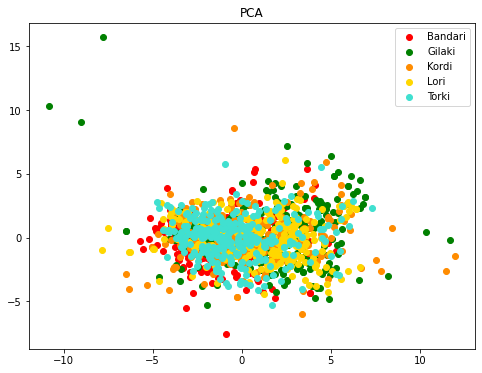

In [8]:
colors = ["red", "green", "darkorange", 'gold', 'turquoise']

pca = PCA(n_components=2)
X_reduced_pca = pca.fit(X).transform(X)
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], encoder.classes_):
    plt.scatter(X_reduced_pca[y == i, 0], X_reduced_pca[y == i, 1], color=color, label=target_name)
plt.legend(loc="best")
plt.title("PCA")
plt.show()

Feature Reduction With LDA

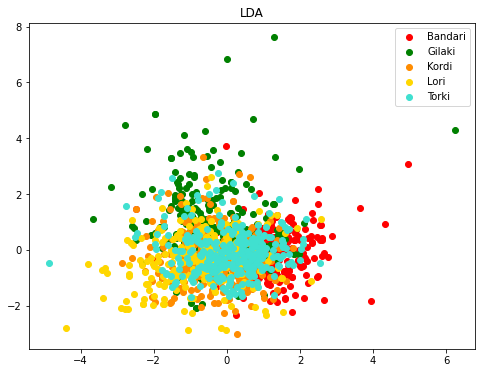

In [9]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_reduced_lda = lda.fit(X, y).transform(X)
colors = ["red", "green", "darkorange", 'gold', 'turquoise']
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], encoder.classes_):
    plt.scatter(X_reduced_lda[y == i, 0], X_reduced_lda[y == i, 1], color=color, label=target_name)
plt.legend(loc="best")
plt.title("LDA")
plt.show()

Classify Original Data with KNN

Set K = 1 and See Confusion matrix

              precision    recall  f1-score   support

           0       0.57      0.48      0.52        58
           1       0.46      0.55      0.50        49
           2       0.55      0.39      0.45        62
           3       0.32      0.39      0.35        49
           4       0.31      0.34      0.33        58

    accuracy                           0.43       276
   macro avg       0.44      0.43      0.43       276
weighted avg       0.45      0.43      0.43       276



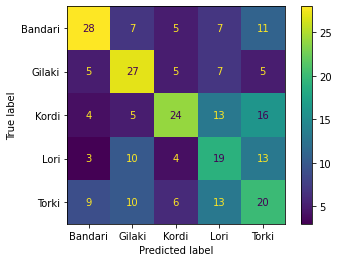

In [10]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)

See Accuracy for k = 1, ... , 50

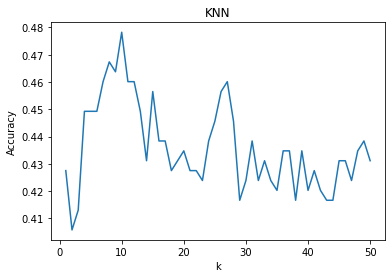

In [11]:
scores = list()
for k in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, neigh.predict(X_test)))
    
plt.figure(figsize=(6, 4))
plt.plot([int(k) for k in range (1, 51)], scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.show()

PCA + KNN

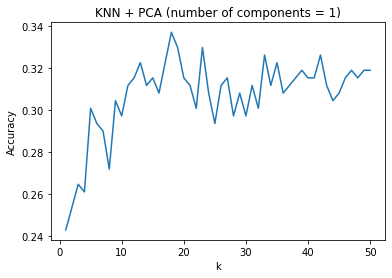

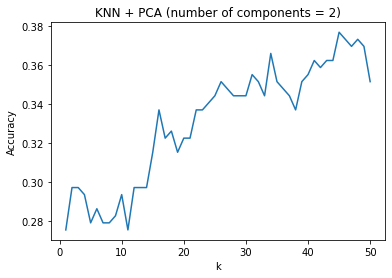

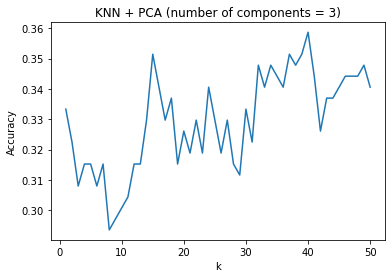

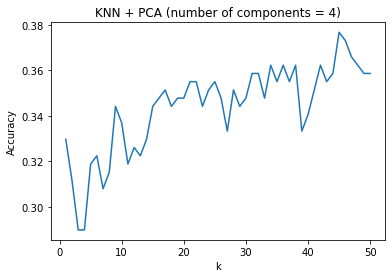

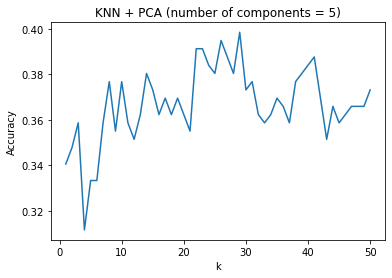

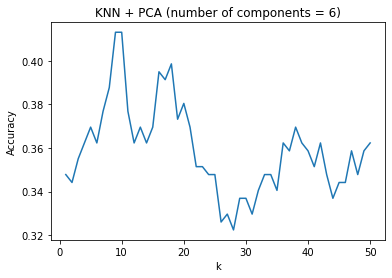

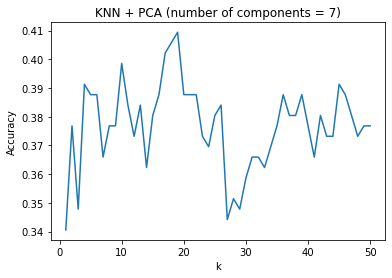

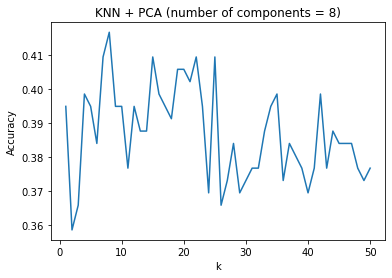

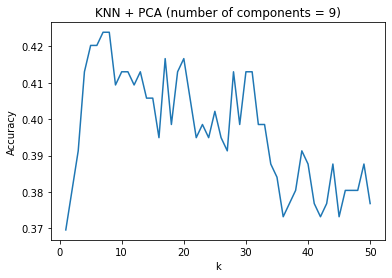

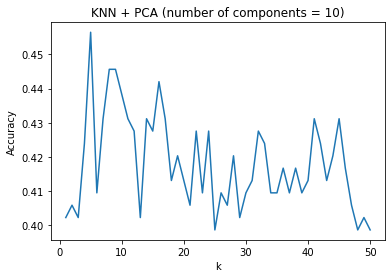

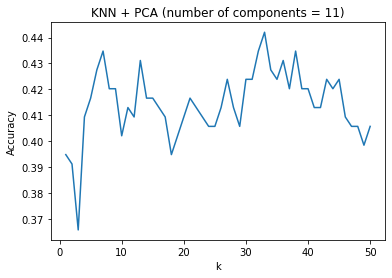

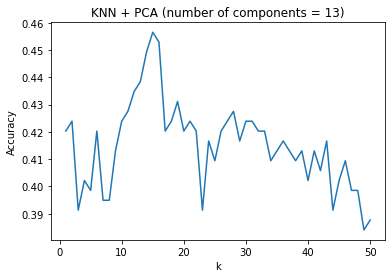

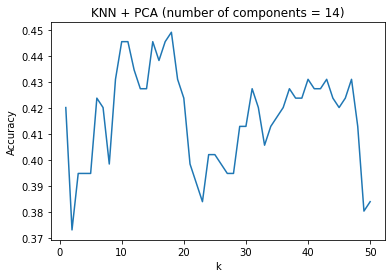

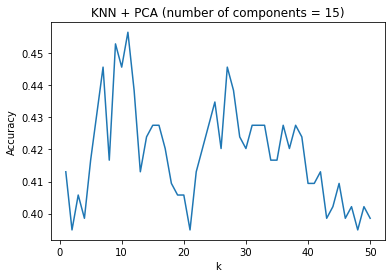

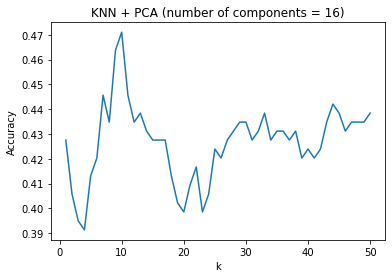

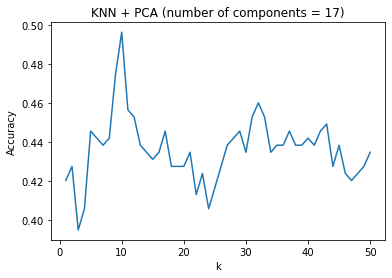

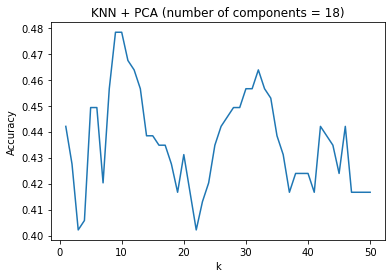

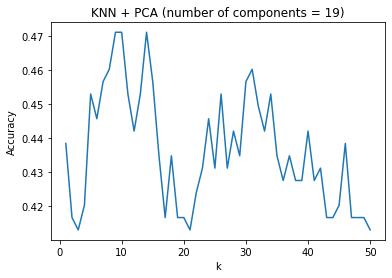

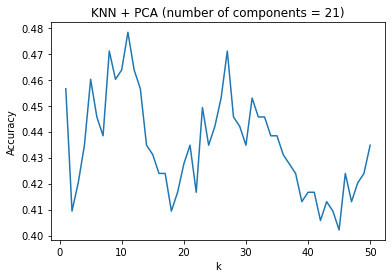

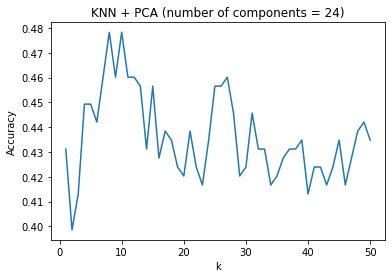

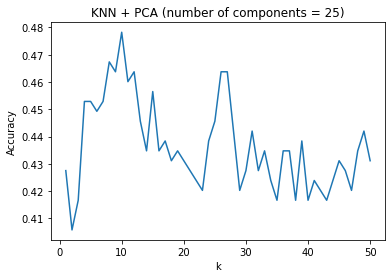

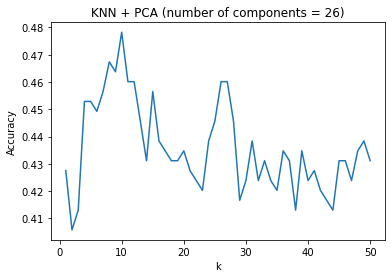

In [12]:
for n in range(1, 27):
    scores = list()
    pca = PCA(n_components=n)
    X_r_train = pca.fit(X_train).transform(X_train)
    X_r_test = pca.transform(X_test)
    for k in range(1, 51):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test, neigh.predict(X_r_test)))
        
    plt.figure(figsize=(6, 4))
    plt.plot([int(k) for k in range (1, 51)], scores)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('KNN + PCA (number of components = %d)' %(n))
    plt.show()

LDA + KNN

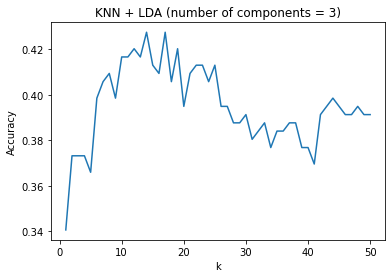

In [13]:
for n in range(1, 5):
    scores = list()
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_r_train = lda.fit(X_train, y_train).transform(X_train)
    X_r_test = lda.transform(X_test)
    for k in range(1, 51):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test, neigh.predict(X_r_test)))
        
    plt.figure(figsize=(6, 4))
    plt.plot([int(k) for k in range (1, 51)], scores)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('KNN + LDA (number of components = %d)' %(n))
    plt.show()

Classify Original Data with Random Forest

Max Depth = 2 and See Confusion matrix

              precision    recall  f1-score   support

           0       0.40      0.59      0.47        58
           1       0.46      0.35      0.40        49
           2       0.54      0.11      0.19        62
           3       0.37      0.53      0.43        49
           4       0.29      0.34      0.31        58

    accuracy                           0.38       276
   macro avg       0.41      0.38      0.36       276
weighted avg       0.41      0.38      0.35       276



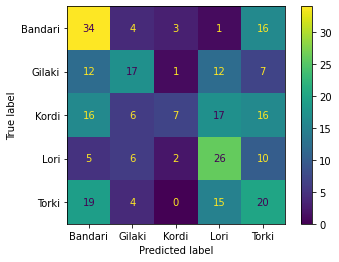

In [14]:
rf = RandomForestClassifier(max_depth=2, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) 
print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)

PCA + Random Forest

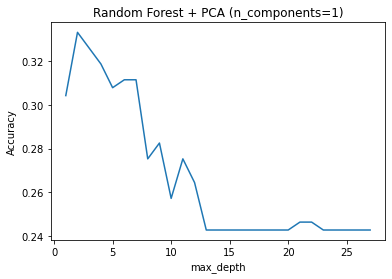

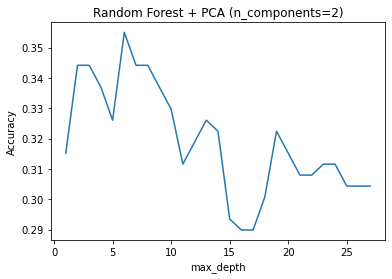

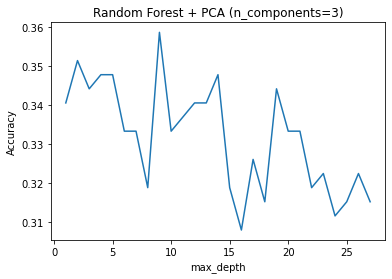

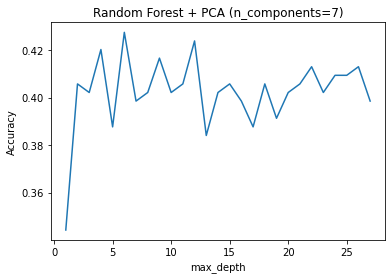

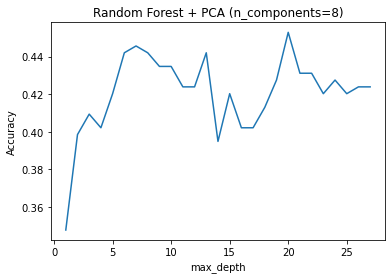

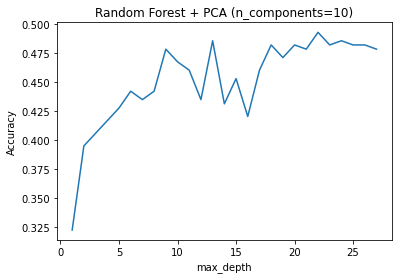

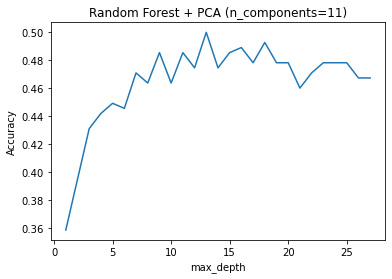

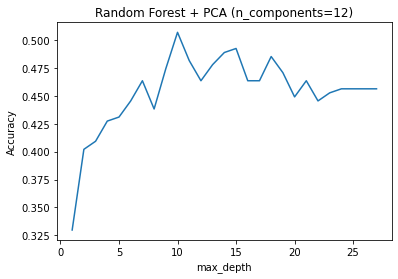

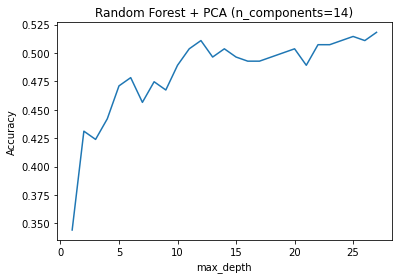

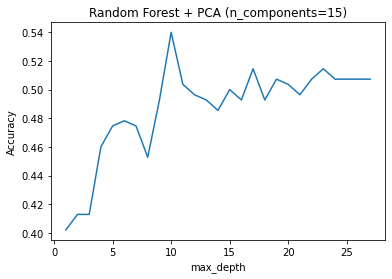

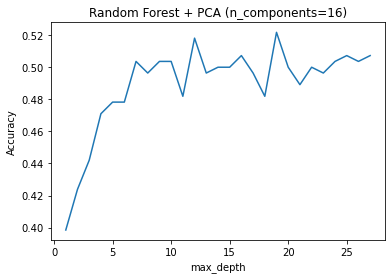

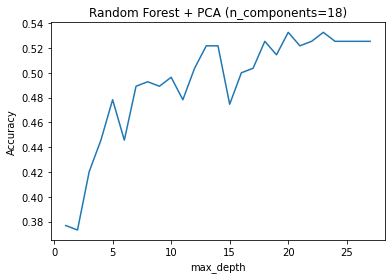

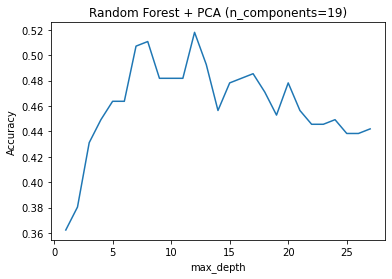

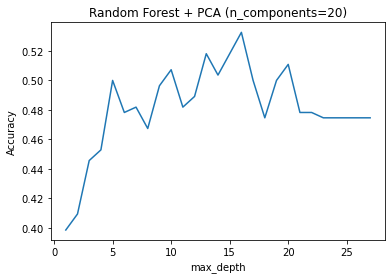

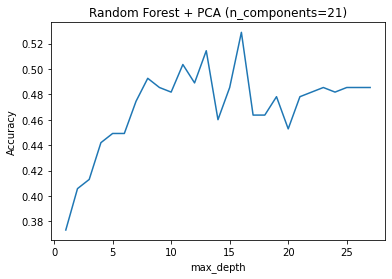

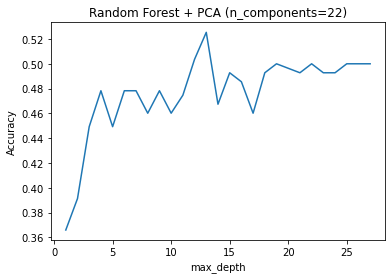

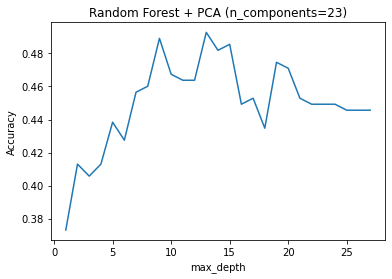

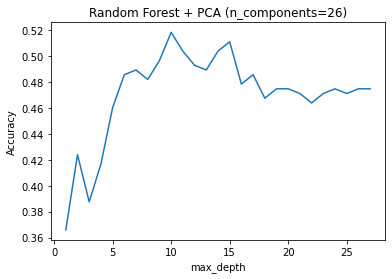

In [15]:
for n in range(1, 27):
    scores = list()
    pca = PCA(n_components=n)
    X_r_train = pca.fit(X_train).transform(X_train)
    X_r_test = pca.transform(X_test)
    for d in range(1, 28):
        rf = RandomForestClassifier(max_depth=d, random_state=1)
        rf.fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test, rf.predict(X_r_test)))
        
    plt.figure(figsize=(6, 4))
    plt.plot([int(d) for d in range (1, 28)], scores)
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title('Random Forest + PCA (n_components=%d)' %(n))
    plt.show()

LDA + Random Forest

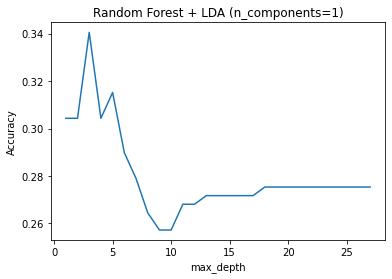

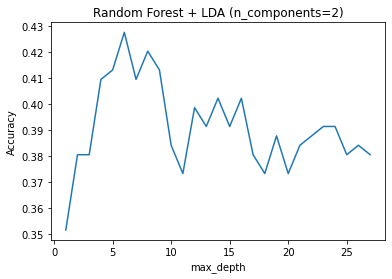

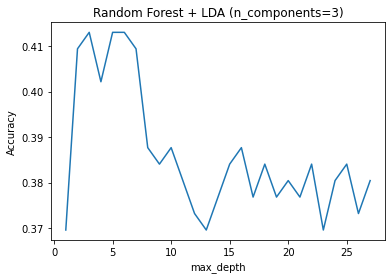

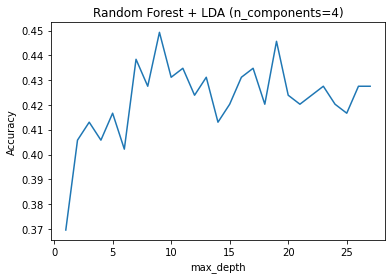

In [16]:
for n in range(1, 5):
    scores = list()
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_r_train = lda.fit(X_train, y_train).transform(X_train)
    X_r_test = lda.transform(X_test)
    for d in range(1, 28):
        rf = RandomForestClassifier(max_depth=d, random_state=1)
        rf.fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test, rf.predict(X_r_test)))

    plt.figure(figsize=(6, 4))
    plt.plot([int(d) for d in range (1, 28)], scores)
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title('Random Forest + LDA (n_components=%d)' %(n))
    plt.show()

PCA + SVM (kernel=poly)

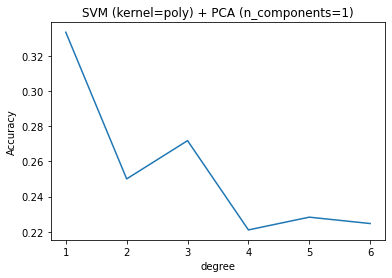

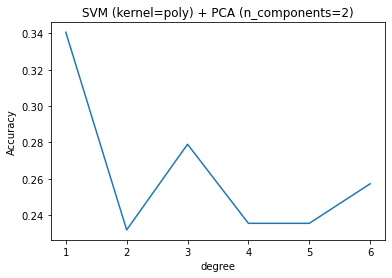

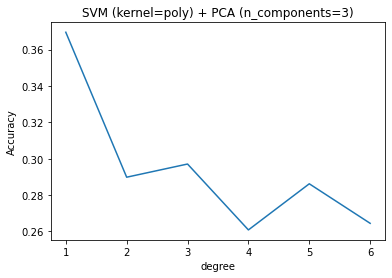

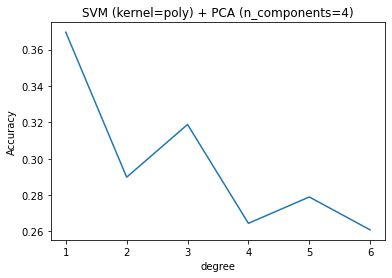

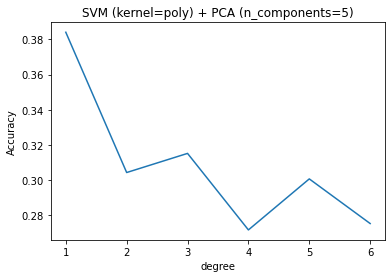

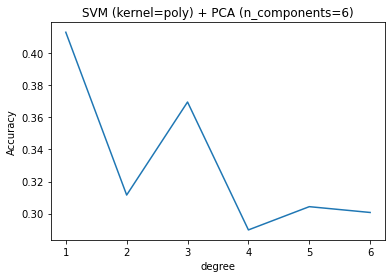

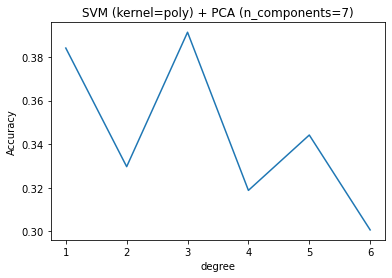

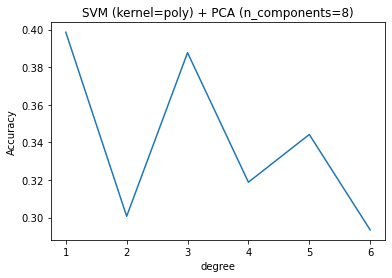

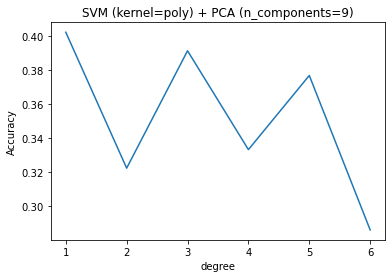

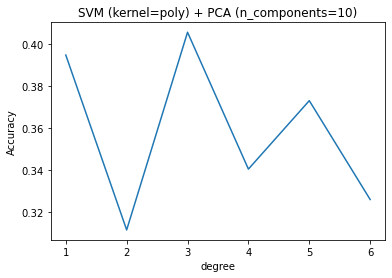

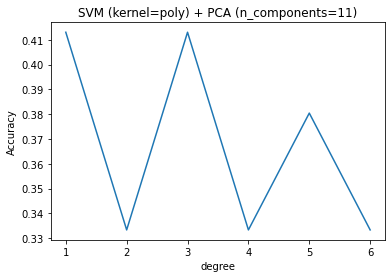

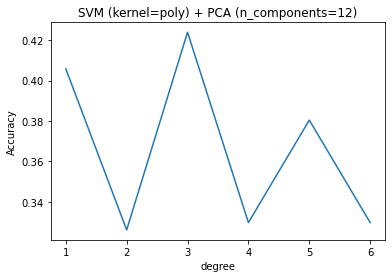

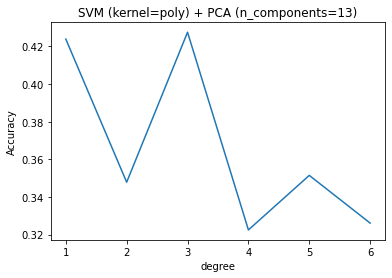

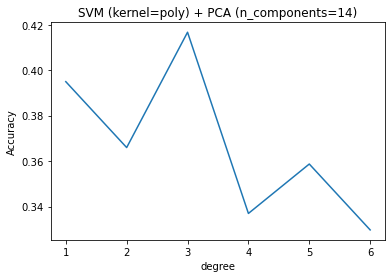

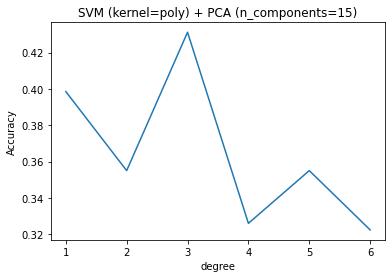

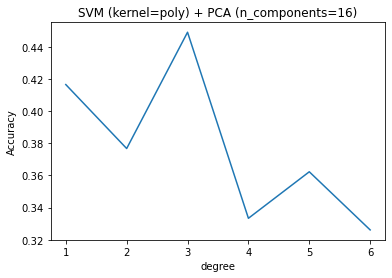

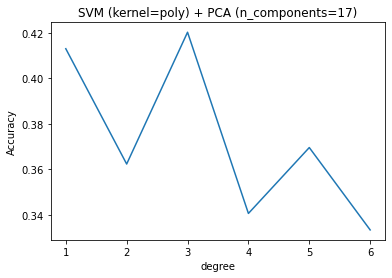

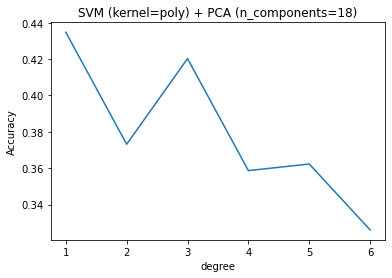

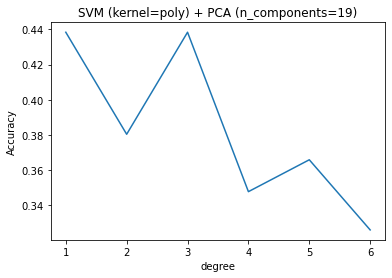

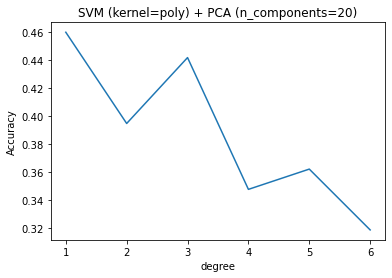

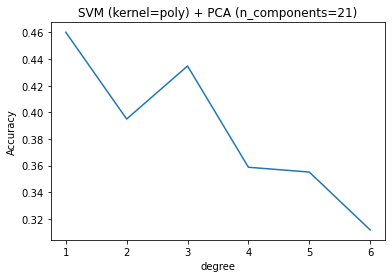

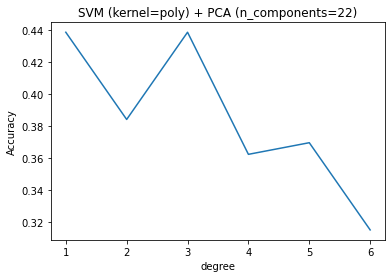

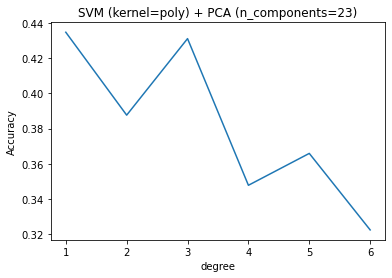

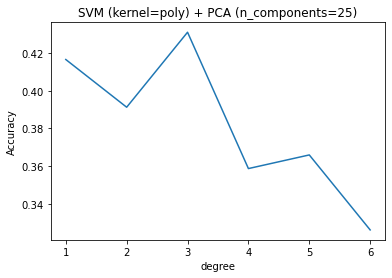

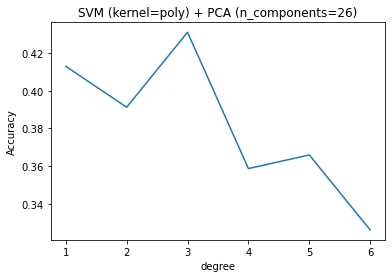

In [17]:
for n in range(1, 27):
    scores = list()
    pca = PCA(n_components=n)
    X_r_train = pca.fit(X_train).transform(X_train)
    X_r_test = pca.transform(X_test)
    for d in range(1, 7):
        SVM = svm.SVC(kernel='poly', degree=d, C=1.5, random_state=1).fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test,  SVM.predict(X_r_test)))
        
    plt.figure(figsize=(6, 4))
    plt.plot([int(d) for d in range (1, 7)], scores)
    plt.xlabel('degree')
    plt.ylabel('Accuracy')
    plt.title('SVM (kernel=poly) + PCA (n_components=%d)' %(n))
    plt.show()

LDA + SVM (kernel=poly)

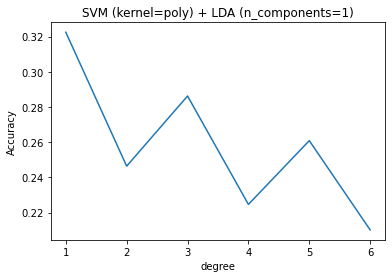

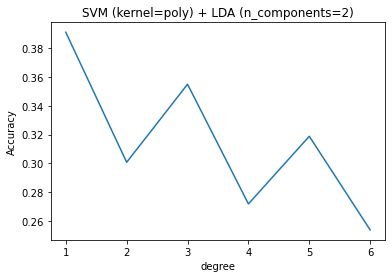

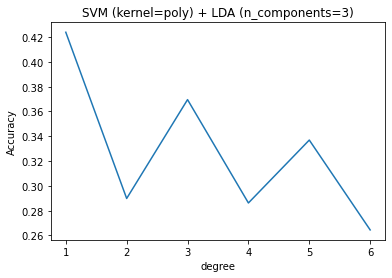

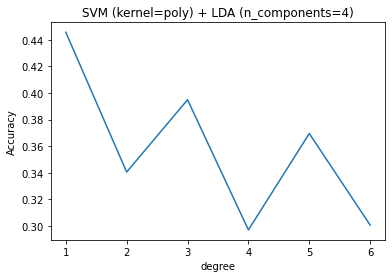

In [18]:
for n in range(1, 5):
    scores = list()
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_r_train = lda.fit(X_train, y_train).transform(X_train)
    X_r_test = lda.transform(X_test)
    for d in range(1, 7):
        SVM = svm.SVC(kernel='poly', degree=d, C=1.5, random_state=1).fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test,  SVM.predict(X_r_test)))

    plt.figure(figsize=(6, 4))
    plt.plot([int(d) for d in range (1, 7)], scores)
    plt.xlabel('degree')
    plt.ylabel('Accuracy')
    plt.title('SVM (kernel=poly) + LDA (n_components=%d)' %(n))
    plt.show()

Classify Original Data with MLP

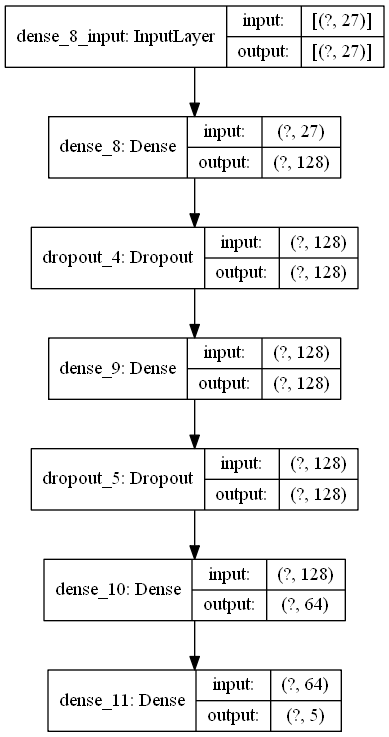

In [28]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
plot_model(model, show_shapes=True)

In [29]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=800, batch_size=128, verbose=True)

Epoch 1/800
8/8 [==============================] - 0s 21ms/step - loss: 1.6923 - accuracy: 0.1925 - val_loss: 1.5646 - val_accuracy: 0.2973
Epoch 2/800
8/8 [==============================] - ETA: 0s - loss: 1.6633 - accuracy: 0.22 - 0s 4ms/step - loss: 1.5884 - accuracy: 0.2550 - val_loss: 1.5415 - val_accuracy: 0.3333
Epoch 3/800
8/8 [==============================] - 0s 4ms/step - loss: 1.5569 - accuracy: 0.2782 - val_loss: 1.5250 - val_accuracy: 0.3243
Epoch 4/800
8/8 [==============================] - 0s 4ms/step - loss: 1.5265 - accuracy: 0.3085 - val_loss: 1.5014 - val_accuracy: 0.3514
Epoch 5/800
8/8 [==============================] - 0s 4ms/step - loss: 1.5075 - accuracy: 0.3599 - val_loss: 1.4855 - val_accuracy: 0.3874
Epoch 6/800
8/8 [==============================] - 0s 4ms/step - loss: 1.5058 - accuracy: 0.3407 - val_loss: 1.4754 - val_accuracy: 0.3874
Epoch 7/800
8/8 [==============================] - 0s 4ms/step - loss: 1.4927 - accuracy: 0.3468 - val_loss: 1.4616 - val_a

8/8 [==============================] - 0s 4ms/step - loss: 0.8708 - accuracy: 0.6663 - val_loss: 1.3826 - val_accuracy: 0.4955
Epoch 118/800
8/8 [==============================] - 0s 4ms/step - loss: 0.8324 - accuracy: 0.6744 - val_loss: 1.3638 - val_accuracy: 0.4955
Epoch 119/800
8/8 [==============================] - 0s 4ms/step - loss: 0.8519 - accuracy: 0.6542 - val_loss: 1.3674 - val_accuracy: 0.5045
Epoch 120/800
8/8 [==============================] - 0s 4ms/step - loss: 0.8385 - accuracy: 0.6653 - val_loss: 1.3814 - val_accuracy: 0.4865
Epoch 121/800
8/8 [==============================] - 0s 4ms/step - loss: 0.8166 - accuracy: 0.6865 - val_loss: 1.3698 - val_accuracy: 0.4595
Epoch 122/800
8/8 [==============================] - 0s 4ms/step - loss: 0.8270 - accuracy: 0.7026 - val_loss: 1.3818 - val_accuracy: 0.4595
Epoch 123/800
8/8 [==============================] - 0s 3ms/step - loss: 0.8090 - accuracy: 0.6865 - val_loss: 1.3896 - val_accuracy: 0.4955
Epoch 124/800
8/8 [========

8/8 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.7671 - val_loss: 1.4548 - val_accuracy: 0.5315
Epoch 234/800
8/8 [==============================] - 0s 4ms/step - loss: 0.5841 - accuracy: 0.7812 - val_loss: 1.4305 - val_accuracy: 0.5315
Epoch 235/800
8/8 [==============================] - 0s 4ms/step - loss: 0.5313 - accuracy: 0.8024 - val_loss: 1.4390 - val_accuracy: 0.5315
Epoch 236/800
8/8 [==============================] - 0s 4ms/step - loss: 0.5726 - accuracy: 0.7893 - val_loss: 1.4267 - val_accuracy: 0.5315
Epoch 237/800
8/8 [==============================] - 0s 4ms/step - loss: 0.5944 - accuracy: 0.7873 - val_loss: 1.4331 - val_accuracy: 0.5405
Epoch 238/800
8/8 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.7772 - val_loss: 1.4419 - val_accuracy: 0.5495
Epoch 239/800
8/8 [==============================] - 0s 4ms/step - loss: 0.5931 - accuracy: 0.7883 - val_loss: 1.4531 - val_accuracy: 0.5315
Epoch 240/800
8/8 [========

Epoch 291/800
8/8 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.8256 - val_loss: 1.4894 - val_accuracy: 0.5495
Epoch 292/800
8/8 [==============================] - 0s 4ms/step - loss: 0.4895 - accuracy: 0.8266 - val_loss: 1.5210 - val_accuracy: 0.5315
Epoch 293/800
8/8 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.8407 - val_loss: 1.5160 - val_accuracy: 0.5405
Epoch 294/800
8/8 [==============================] - 0s 4ms/step - loss: 0.4635 - accuracy: 0.8266 - val_loss: 1.4928 - val_accuracy: 0.5495
Epoch 295/800
8/8 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.8054 - val_loss: 1.4681 - val_accuracy: 0.5856
Epoch 296/800
8/8 [==============================] - 0s 4ms/step - loss: 0.4930 - accuracy: 0.8054 - val_loss: 1.4544 - val_accuracy: 0.5766
Epoch 297/800
8/8 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.8226 - val_loss: 1.4646 - val_accuracy: 0.5676
Epoch 298/800

8/8 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8458 - val_loss: 1.5727 - val_accuracy: 0.5586
Epoch 406/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8518 - val_loss: 1.5710 - val_accuracy: 0.5766
Epoch 407/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8649 - val_loss: 1.5609 - val_accuracy: 0.5766
Epoch 408/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8730 - val_loss: 1.5478 - val_accuracy: 0.5856
Epoch 409/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3729 - accuracy: 0.8619 - val_loss: 1.5360 - val_accuracy: 0.5586
Epoch 410/800
8/8 [==============================] - 0s 4ms/step - loss: 0.4044 - accuracy: 0.8518 - val_loss: 1.5332 - val_accuracy: 0.5676
Epoch 411/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8609 - val_loss: 1.5136 - val_accuracy: 0.5676
Epoch 412/800
8/8 [========

Epoch 520/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8881 - val_loss: 1.6345 - val_accuracy: 0.5676
Epoch 521/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.8639 - val_loss: 1.6401 - val_accuracy: 0.5676
Epoch 522/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8911 - val_loss: 1.6623 - val_accuracy: 0.5676
Epoch 523/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3551 - accuracy: 0.8679 - val_loss: 1.6935 - val_accuracy: 0.5766
Epoch 524/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8851 - val_loss: 1.6606 - val_accuracy: 0.5676
Epoch 525/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.8841 - val_loss: 1.6396 - val_accuracy: 0.5766
Epoch 526/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8851 - val_loss: 1.6332 - val_accuracy: 0.5766
Epoch 527/800

Epoch 636/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8891 - val_loss: 1.7055 - val_accuracy: 0.5766
Epoch 637/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3290 - accuracy: 0.8861 - val_loss: 1.6753 - val_accuracy: 0.5856
Epoch 638/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3145 - accuracy: 0.8952 - val_loss: 1.6698 - val_accuracy: 0.5946
Epoch 639/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3081 - accuracy: 0.8841 - val_loss: 1.7001 - val_accuracy: 0.5856
Epoch 640/800
8/8 [==============================] - 0s 4ms/step - loss: 0.2978 - accuracy: 0.8881 - val_loss: 1.7032 - val_accuracy: 0.5766
Epoch 641/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3082 - accuracy: 0.8881 - val_loss: 1.6978 - val_accuracy: 0.5766
Epoch 642/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3160 - accuracy: 0.8871 - val_loss: 1.6912 - val_accuracy: 0.5676
Epoch 643/800

8/8 [==============================] - 0s 4ms/step - loss: 0.3101 - accuracy: 0.8962 - val_loss: 1.7616 - val_accuracy: 0.5405
Epoch 752/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.8921 - val_loss: 1.7451 - val_accuracy: 0.5495
Epoch 753/800
8/8 [==============================] - 0s 4ms/step - loss: 0.2719 - accuracy: 0.9032 - val_loss: 1.7506 - val_accuracy: 0.5495
Epoch 754/800
8/8 [==============================] - 0s 4ms/step - loss: 0.2938 - accuracy: 0.8831 - val_loss: 1.7470 - val_accuracy: 0.5495
Epoch 755/800
8/8 [==============================] - 0s 4ms/step - loss: 0.2535 - accuracy: 0.9153 - val_loss: 1.7371 - val_accuracy: 0.5586
Epoch 756/800
8/8 [==============================] - 0s 4ms/step - loss: 0.2837 - accuracy: 0.9012 - val_loss: 1.7326 - val_accuracy: 0.5495
Epoch 757/800
8/8 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.9062 - val_loss: 1.7681 - val_accuracy: 0.5495
Epoch 758/800
8/8 [========

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 776us/step - loss: 1.8966 - accuracy: 0.5435


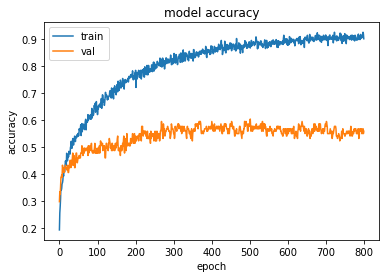

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

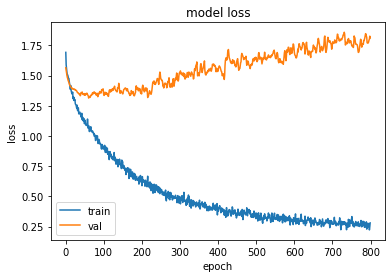

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

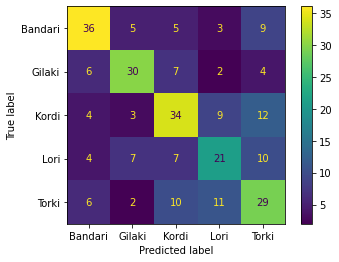

In [33]:
y_pred = np.argmax(model.predict(X_test), axis = -1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)

PCA + MLP

Restoring model weights from the end of the best epoch.
Epoch 00156: early stopping
train result (n_components=1):
35/35 [==============================] - 0s 684us/step - loss: 1.5144 - accuracy: 0.3273
test result (n_components=1):
9/9 [==============================] - 0s 665us/step - loss: 1.4988 - accuracy: 0.3442
Restoring model weights from the end of the best epoch.
Epoch 00174: early stopping
train result (n_components=2):
35/35 [==============================] - 0s 798us/step - loss: 1.4469 - accuracy: 0.3726
test result (n_components=2):
9/9 [==============================] - 0s 887us/step - loss: 1.4922 - accuracy: 0.3297
Restoring model weights from the end of the best epoch.
Epoch 00070: early stopping
train result (n_components=3):
35/35 [==============================] - 0s 625us/step - loss: 1.4416 - accuracy: 0.3663
test result (n_components=3):
9/9 [==============================] - 0s 665us/step - loss: 1.5181 - accuracy: 0.3261
Restoring model weights from the end 

9/9 [==============================] - 0s 776us/step - loss: 1.1996 - accuracy: 0.4891
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
train result (n_components=24):
35/35 [==============================] - 0s 628us/step - loss: 1.1345 - accuracy: 0.5703
test result (n_components=24):
9/9 [==============================] - 0s 665us/step - loss: 1.2637 - accuracy: 0.4493
Restoring model weights from the end of the best epoch.
Epoch 00059: early stopping
train result (n_components=25):
35/35 [==============================] - 0s 684us/step - loss: 1.0246 - accuracy: 0.6383
test result (n_components=25):
9/9 [==============================] - 0s 665us/step - loss: 1.1985 - accuracy: 0.5072
Restoring model weights from the end of the best epoch.
Epoch 00069: early stopping
train result (n_components=26):
35/35 [==============================] - 0s 684us/step - loss: 0.9474 - accuracy: 0.6655
test result (n_components=26):
9/9 [==========================

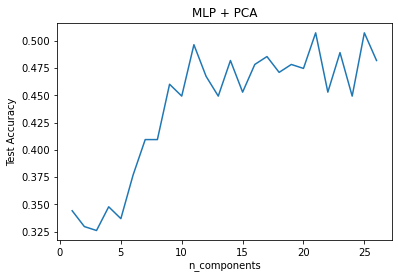

In [39]:
scores = list()
for n in range(1, 27):
    pca = PCA(n_components=n)
    X_r_train = pca.fit(X_train).transform(X_train)
    X_r_test = pca.transform(X_test)

    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_r_train.shape[1],)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="auto", patience = 20, verbose=1, restore_best_weights = True)
    model.fit(X_r_train, y_train, epochs=250, batch_size=128, validation_split=0.1, verbose=0, callbacks =[earlystopping])
    
    print('train result (n_components=%d):' %(n))
    _, train_acc = model.evaluate(X_r_train, y_train)
    print('test result (n_components=%d):' %(n))
    _, test_acc = model.evaluate(X_r_test, y_test)
    scores.append(test_acc)
        
plt.figure(figsize=(6, 4))
plt.plot([int(n) for n in range (1, 27)], scores)
plt.xlabel('n_components')
plt.ylabel('Test Accuracy')
plt.title('MLP + PCA')
plt.show()

LDA + MLP

Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping
train result (n_components=1):
35/35 [==============================] - 0s 643us/step - loss: 1.4342 - accuracy: 0.3454
test result (n_components=1):
9/9 [==============================] - 0s 663us/step - loss: 1.4245 - accuracy: 0.3333
Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping
train result (n_components=2):
35/35 [==============================] - 0s 655us/step - loss: 1.3546 - accuracy: 0.4034
test result (n_components=2):
9/9 [==============================] - 0s 776us/step - loss: 1.3421 - accuracy: 0.4239
Restoring model weights from the end of the best epoch.
Epoch 00025: early stopping
train result (n_components=3):
35/35 [==============================] - 0s 598us/step - loss: 1.3268 - accuracy: 0.4497
test result (n_components=3):
9/9 [==============================] - 0s 665us/step - loss: 1.3217 - accuracy: 0.4239
Restoring model weights from the end 

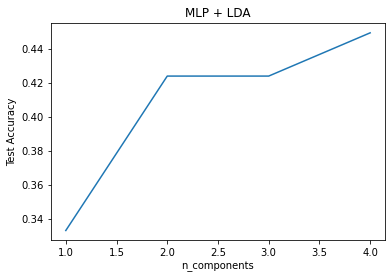

In [40]:
scores = list()
for n in range(1, 5):
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_r_train = lda.fit(X_train, y_train).transform(X_train)
    X_r_test = lda.transform(X_test)

    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_r_train.shape[1],)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="auto", patience = 20, verbose=1, restore_best_weights = True)
    model.fit(X_r_train, y_train, epochs=250, batch_size=128, validation_split=0.1, verbose=0, callbacks =[earlystopping])
    
    print('train result (n_components=%d):' %(n))
    _, train_acc = model.evaluate(X_r_train, y_train)
    print('test result (n_components=%d):' %(n))
    _, test_acc = model.evaluate(X_r_test, y_test)
    scores.append(test_acc)
        
plt.figure(figsize=(6, 4))
plt.plot([int(n) for n in range (1, 5)], scores)
plt.xlabel('n_components')
plt.ylabel('Test Accuracy')
plt.title('MLP + LDA')
plt.show()

Use Neural Network for Feature Extraction

In [41]:
model = load_model('FeatureExtractorModel.h5')
extractor = keras.Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])
features = extractor(X)

Impelement PCA on MLP's Extracted Features

Set number_of_components = 2, in order to show in 2D plot 

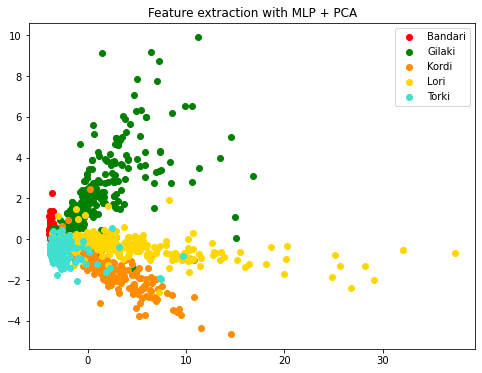

In [42]:
pca = PCA(n_components=2)
X_r = pca.fit(np.array(features[4])).transform(np.array(features[4]))
colors = ["red", "green", "darkorange", 'gold', 'turquoise']
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], encoder.classes_):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, label=target_name)
plt.legend(loc="best")
plt.title("Feature extraction with MLP + PCA")
plt.show()

Impelement LDA on MLP's Extracted Features

Set number_of_components = 2, in order to show in 2D plot 

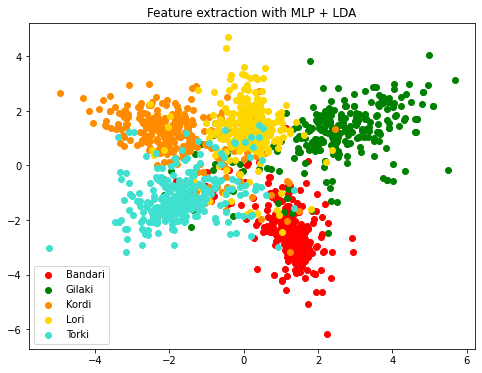

In [43]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(np.array(features[4]), y).transform(np.array(features[4]))
colors = ["red", "green", "darkorange", 'gold', 'turquoise']
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], encoder.classes_):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, label=target_name)
plt.legend(loc="best")
plt.title("Feature extraction with MLP + LDA")
plt.show()

Feature extraction with MLP + PCA + KNN

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        58
           1       0.91      0.82      0.86        49
           2       0.84      0.84      0.84        62
           3       0.84      0.84      0.84        49
           4       0.80      0.78      0.79        58

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



D:\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


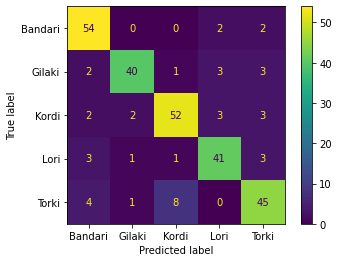

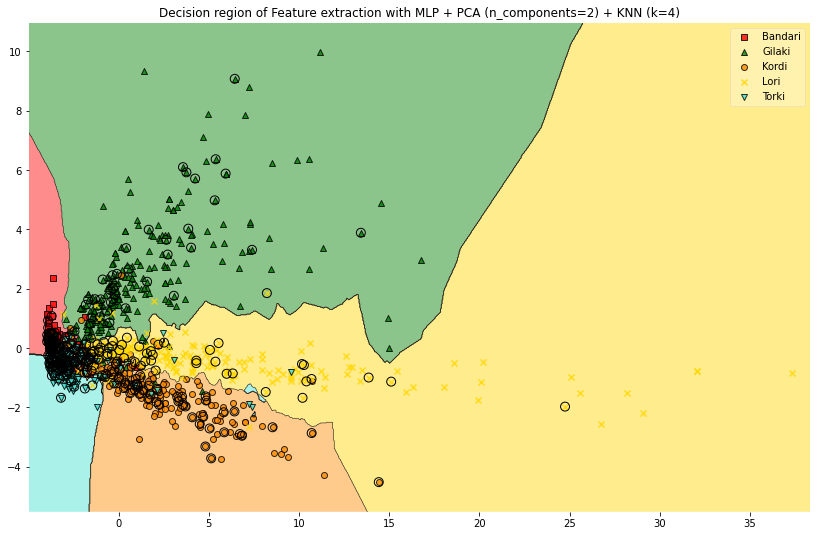

In [44]:
pca = PCA(n_components=2)
X_r_train = pca.fit(np.array(extractor(X_train.to_numpy())[4])).transform(np.array(extractor(X_train.to_numpy())[4]))
X_r_test = pca.transform(np.array(extractor(X_test.to_numpy())[4]))
X_r = pca.transform(np.array(extractor(X)[4]))

neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_r_train, y_train)
y_pred = neigh.predict(X_r_test)

print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)
plt.figure(figsize=(14,9))
ax = plot_decision_regions(X_r, y, clf=neigh, X_highlight=X_r_test, legend=2, colors=','.join(colors))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, encoder.classes_, framealpha=0.3, scatterpoints=1)
plt.title('Decision region of Feature extraction with MLP + PCA (n_components=2) + KNN (k=4)')
plt.show()

Feature extraction with MLP + LDA + KNN

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        58
           1       0.85      0.80      0.82        49
           2       0.76      0.82      0.79        62
           3       0.75      0.73      0.74        49
           4       0.78      0.72      0.75        58

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



D:\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


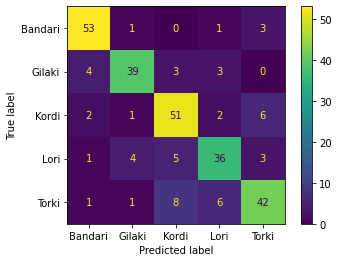

In [45]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r_train = lda.fit(np.array(extractor(X_train.to_numpy())[4]), y_train).transform(np.array(extractor(X_train.to_numpy())[4]))
X_r_test = lda.transform(np.array(extractor(X_test.to_numpy())[4]))
X_r = lda.transform(np.array(extractor(X)[4]))

neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_r_train, y_train)
y_pred = neigh.predict(X_r_test)

print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)
plt.figure(figsize=(14,9))
ax = plot_decision_regions(X_r, y, clf=neigh, X_highlight=X_r_test, legend=2, colors=','.join(colors))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, encoder.classes_, framealpha=0.3, scatterpoints=1)
plt.title('Decision region of Feature extraction with MLP + LDA (n_components=2) + KNN (k=4)')
plt.show()

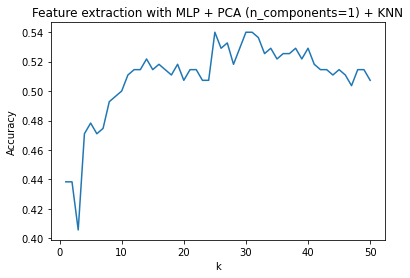

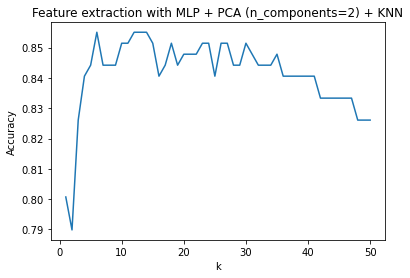

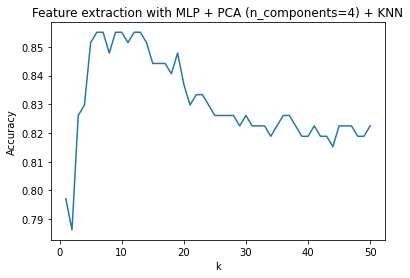

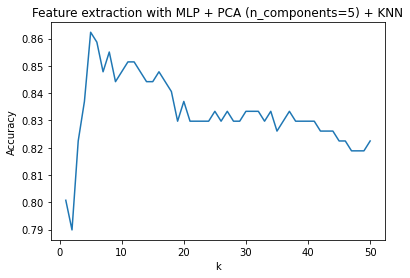

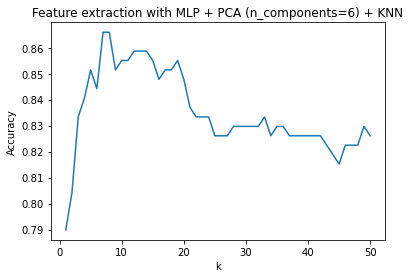

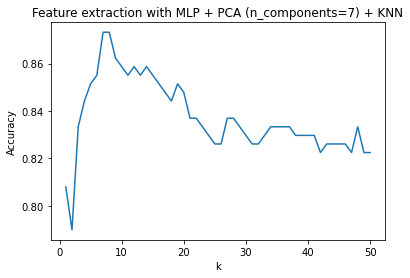

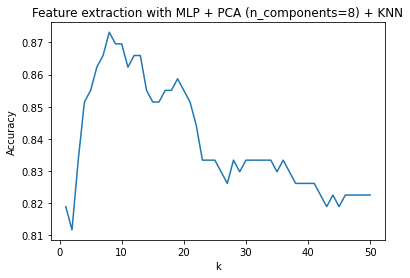

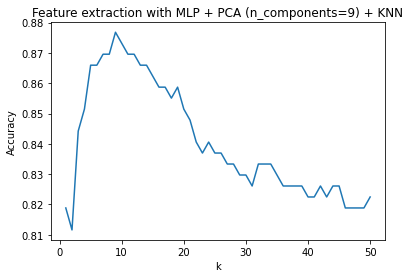

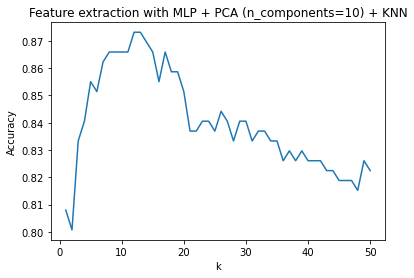

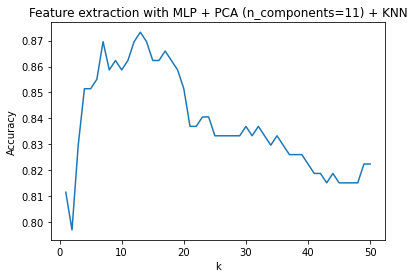

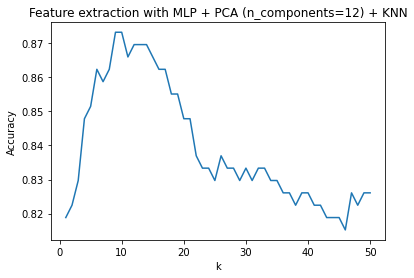

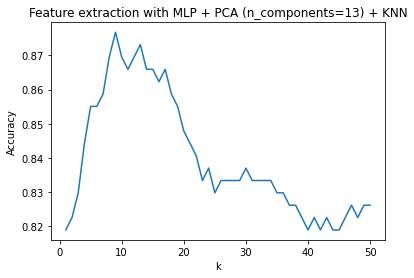

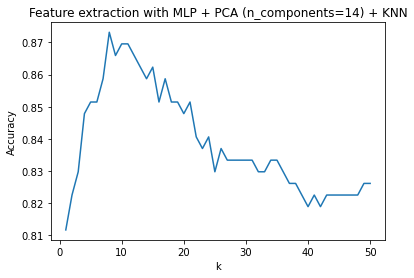

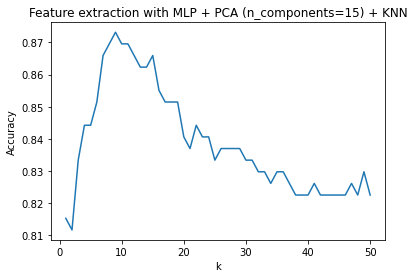

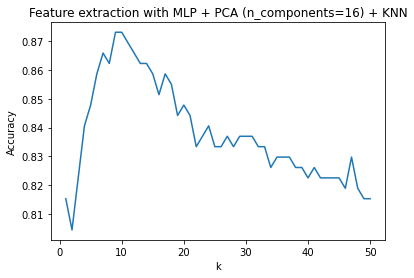

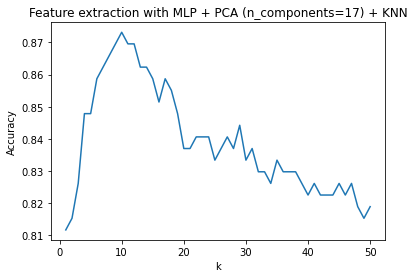

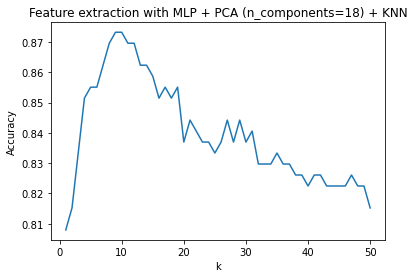

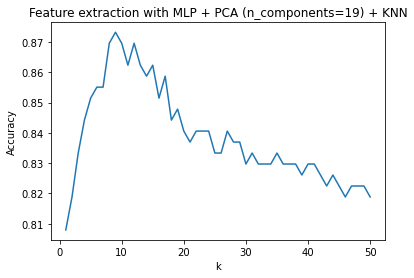

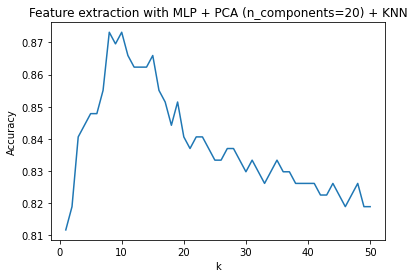

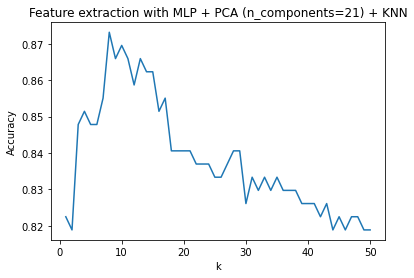

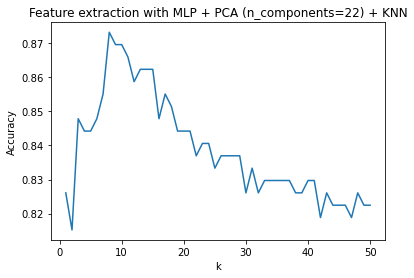

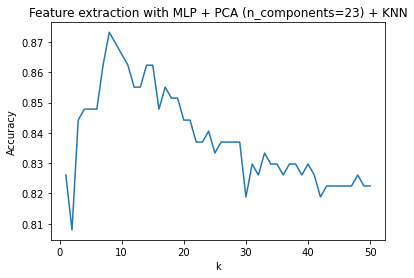

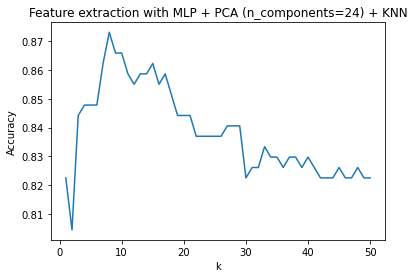

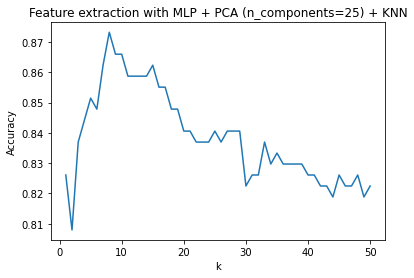

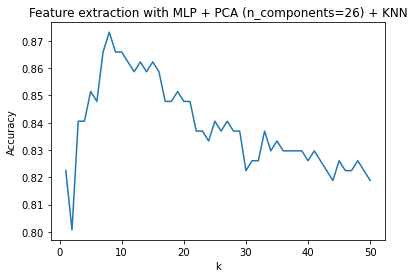

In [52]:
for n in range(1, 27):
    scores = list()
    pca = PCA(n_components=n)
    X_r_train = pca.fit(np.array(extractor(X_train.to_numpy())[4])).transform(np.array(extractor(X_train.to_numpy())[4]))
    X_r_test = pca.transform(np.array(extractor(X_test.to_numpy())[4]))
    
    for k in range(1, 51):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test, neigh.predict(X_r_test)))
        
    plt.figure(figsize=(6, 4))
    plt.plot([int(k) for k in range (1, 51)], scores)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Feature extraction with MLP + PCA (n_components=%d) + KNN' %(n))
    plt.show()

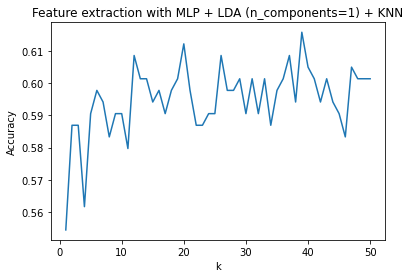

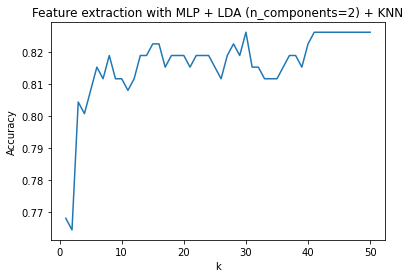

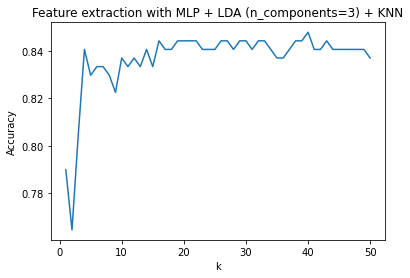

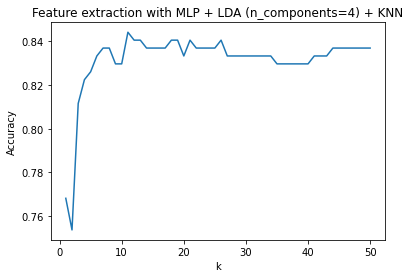

In [47]:
for n in range(1, 5):
    scores = list()
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_r_train = lda.fit(np.array(extractor(X_train.to_numpy())[4]), y_train).transform(np.array(extractor(X_train.to_numpy())[4]))
    X_r_test = lda.transform(np.array(extractor(X_test.to_numpy())[4]))
    for k in range(1, 51):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test, neigh.predict(X_r_test)))
        
    plt.figure(figsize=(6, 4))
    plt.plot([int(k) for k in range (1, 51)], scores)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Feature extraction with MLP + LDA (n_components=%d) + KNN' %(n))
    plt.show()

Feature extraction with MLP + PCA + Random Forest

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        58
           1       0.97      0.78      0.86        49
           2       0.82      0.79      0.80        62
           3       0.70      0.80      0.74        49
           4       0.82      0.78      0.80        58

    accuracy                           0.82       276
   macro avg       0.83      0.82      0.82       276
weighted avg       0.83      0.82      0.82       276



D:\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


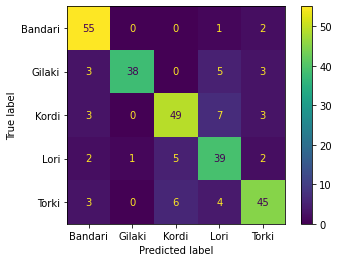

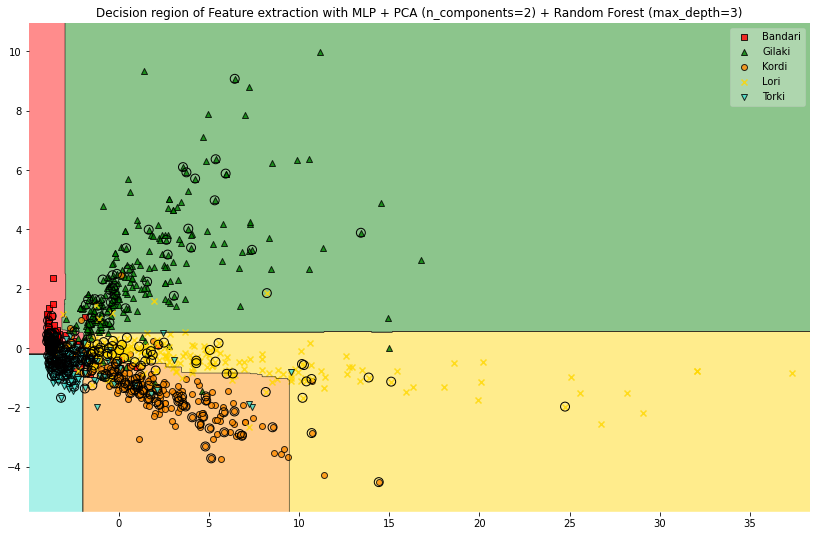

In [48]:
pca = PCA(n_components=2)
X_r_train = pca.fit(np.array(extractor(X_train.to_numpy())[4])).transform(np.array(extractor(X_train.to_numpy())[4]))
X_r_test = pca.transform(np.array(extractor(X_test.to_numpy())[4]))
X_r = pca.transform(np.array(extractor(X)[4]))

rf = RandomForestClassifier(max_depth=3, random_state=1)
rf.fit(X_r_train, y_train)
y_pred = rf.predict(X_r_test) 
print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)
plt.figure(figsize=(14,9))
ax = plot_decision_regions(X_r, y, clf=rf, X_highlight=X_r_test, legend=2, colors=','.join(colors))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, encoder.classes_, framealpha=0.3, scatterpoints=1)
plt.title('Decision region of Feature extraction with MLP + PCA (n_components=2) + Random Forest (max_depth=3)')
plt.show()

Feature extraction with MLP + LDA + Random Forest

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.95      0.78      0.85        49
           2       0.77      0.79      0.78        62
           3       0.76      0.80      0.78        49
           4       0.76      0.81      0.78        58

    accuracy                           0.82       276
   macro avg       0.83      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



D:\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


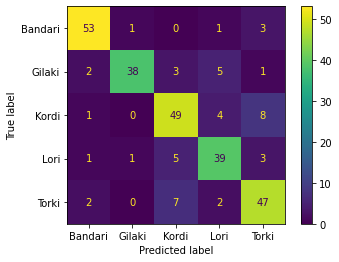

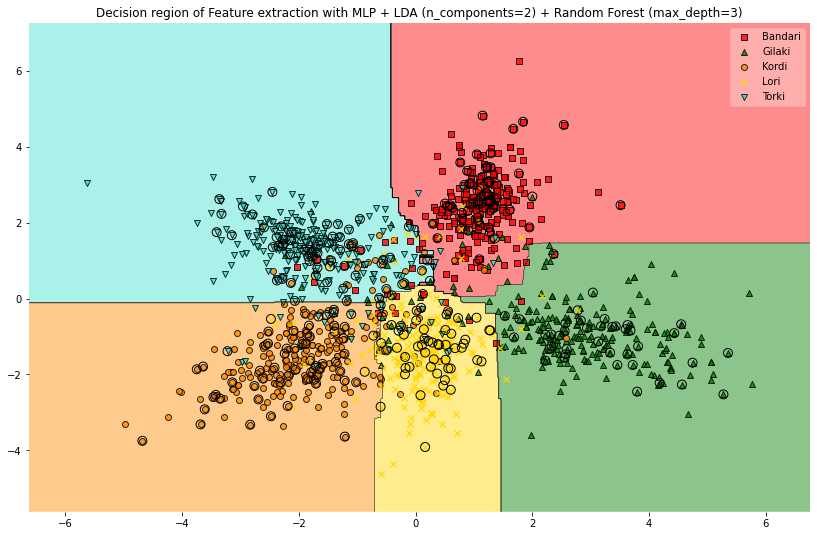

In [49]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r_train = lda.fit(np.array(extractor(X_train.to_numpy())[4]), y_train).transform(np.array(extractor(X_train.to_numpy())[4]))
X_r_test = lda.transform(np.array(extractor(X_test.to_numpy())[4]))
X_r = lda.transform(np.array(extractor(X)[4]))

rf = RandomForestClassifier(max_depth=3, random_state=1)
rf.fit(X_r_train, y_train)
y_pred = rf.predict(X_r_test) 
print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)
plt.figure(figsize=(14,9))
ax = plot_decision_regions(X_r, y, clf=rf, X_highlight=X_r_test, legend=2, colors=','.join(colors))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, encoder.classes_, framealpha=0.3, scatterpoints=1)
plt.title('Decision region of Feature extraction with MLP + LDA (n_components=2) + Random Forest (max_depth=3)')
plt.show()

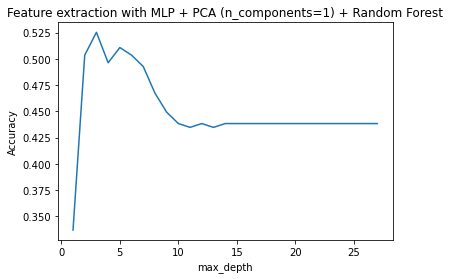

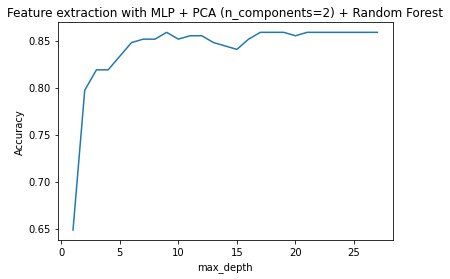

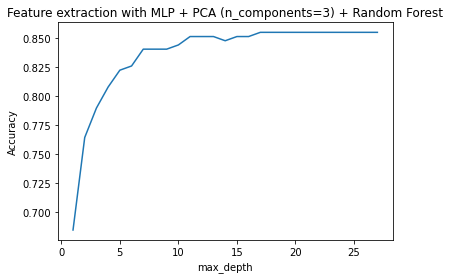

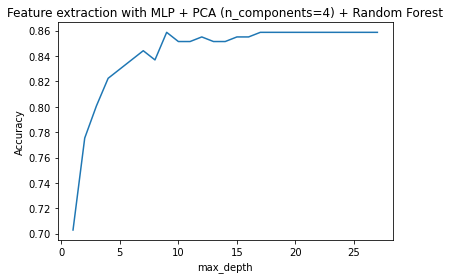

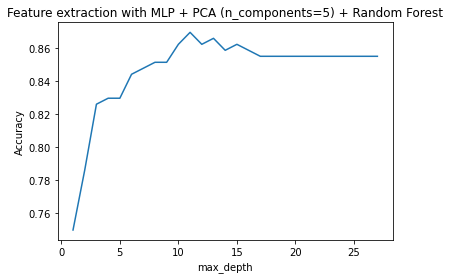

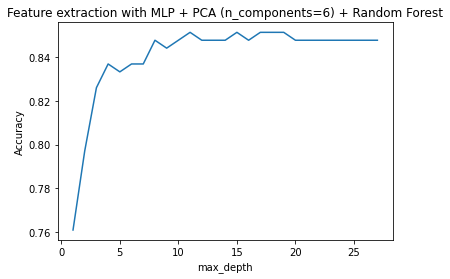

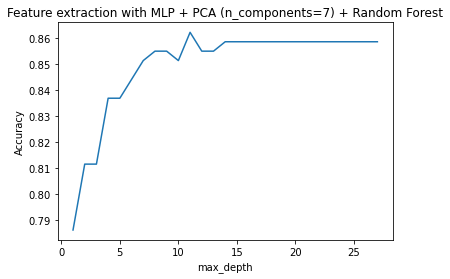

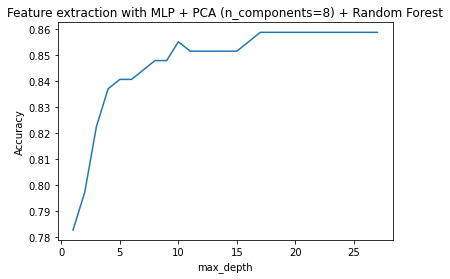

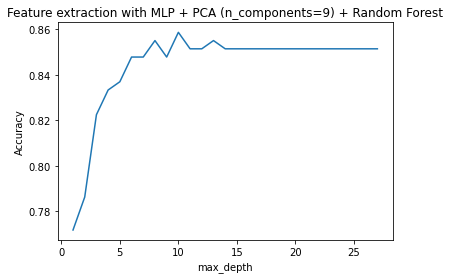

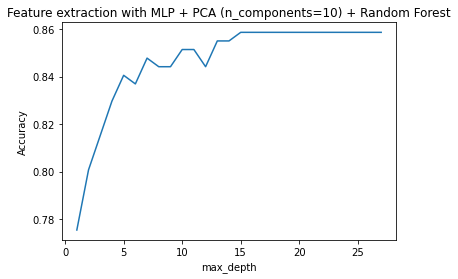

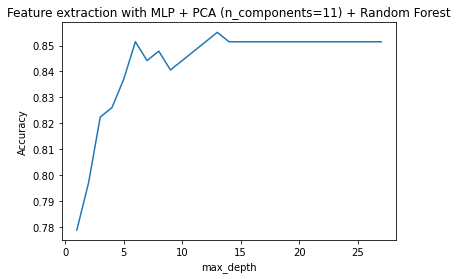

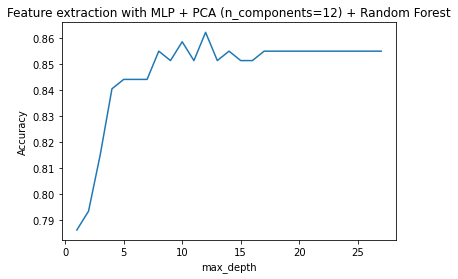

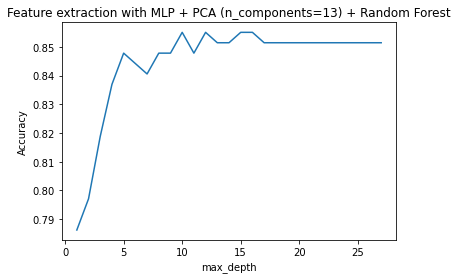

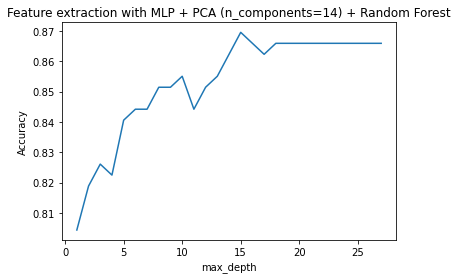

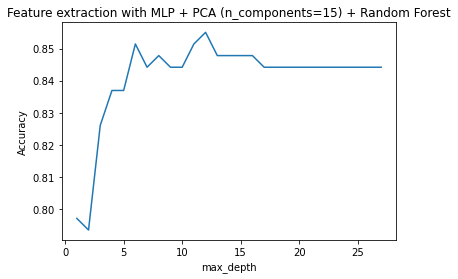

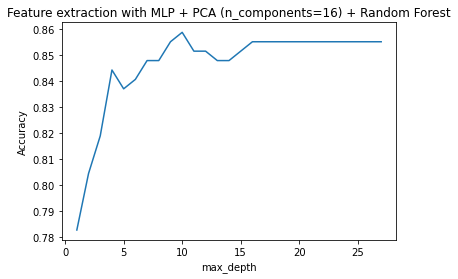

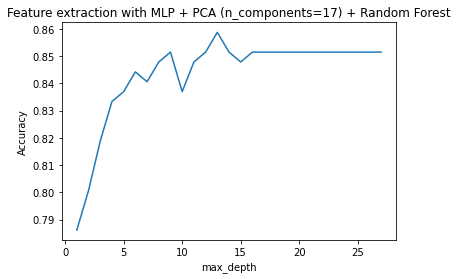

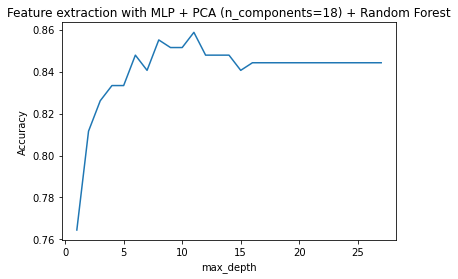

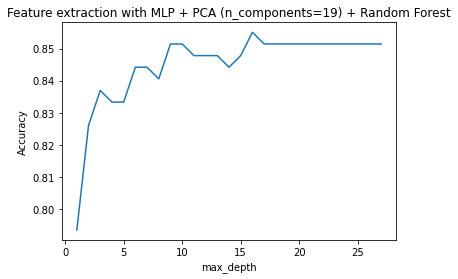

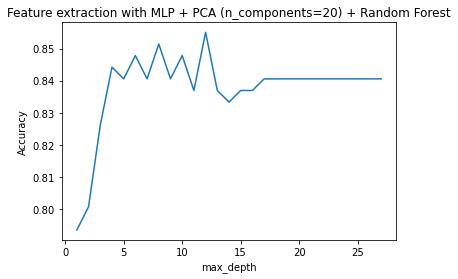

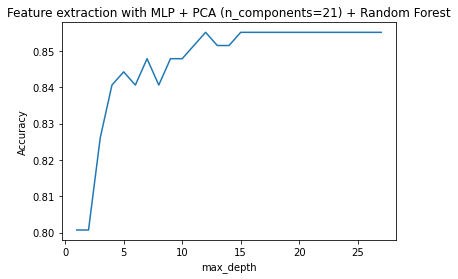

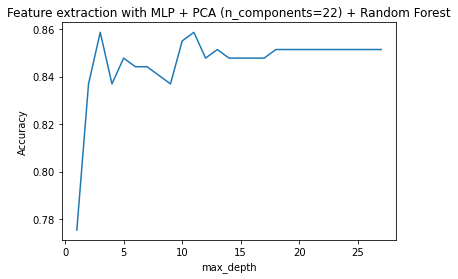

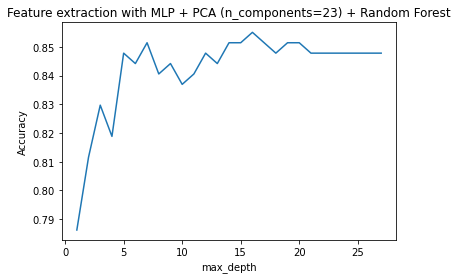

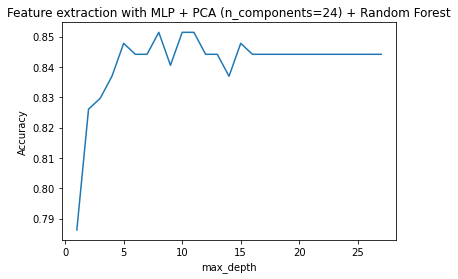

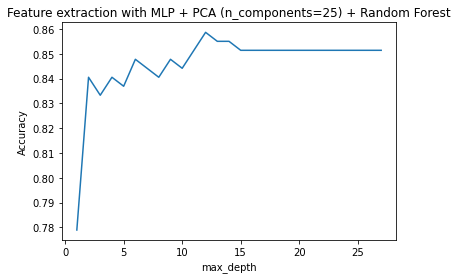

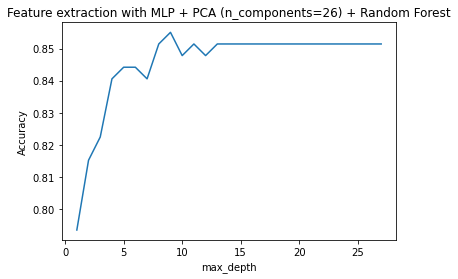

In [57]:
for n in range(1, 27):
    scores = list()
    pca = PCA(n_components=n)
    X_r_train = pca.fit(np.array(extractor(X_train.to_numpy())[4])).transform(np.array(extractor(X_train.to_numpy())[4]))
    X_r_test = pca.transform(np.array(extractor(X_test.to_numpy())[4]))
    for d in range(1, 28):
        rf = RandomForestClassifier(max_depth=d, random_state=1)
        rf.fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test, rf.predict(X_r_test)))
        
    plt.figure(figsize=(6, 4))
    plt.plot([int(d) for d in range (1, 28)], scores)
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title('Feature extraction with MLP + PCA (n_components=%d) + Random Forest' %(n))
    plt.show()

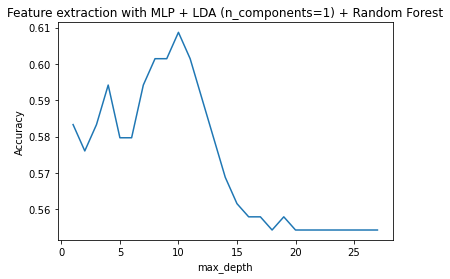

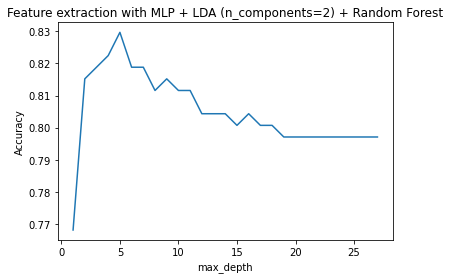

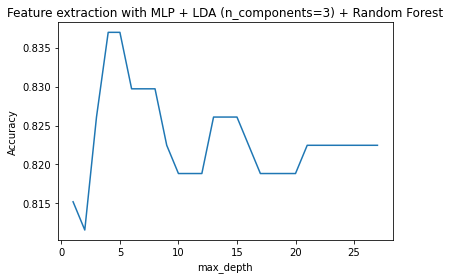

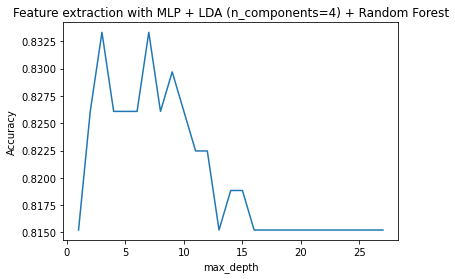

In [51]:
for n in range(1, 5):
    scores = list()
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_r_train = lda.fit(np.array(extractor(X_train.to_numpy())[4]), y_train).transform(np.array(extractor(X_train.to_numpy())[4]))
    X_r_test = lda.transform(np.array(extractor(X_test.to_numpy())[4]))
    for d in range(1, 28):
        rf = RandomForestClassifier(max_depth=d, random_state=1)
        rf.fit(X_r_train, y_train)
        scores.append(accuracy_score(y_test, rf.predict(X_r_test)))

    plt.figure(figsize=(6, 4))
    plt.plot([int(d) for d in range (1, 28)], scores)
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title('Feature extraction with MLP + LDA (n_components=%d) + Random Forest' %(n))
    plt.show()

Feature extraction with MLP + PCA + MLP

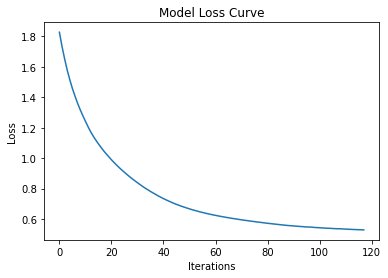

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        58
           1       0.97      0.80      0.88        49
           2       0.88      0.84      0.86        62
           3       0.89      0.86      0.88        49
           4       0.81      0.81      0.81        58

    accuracy                           0.86       276
   macro avg       0.87      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



D:\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


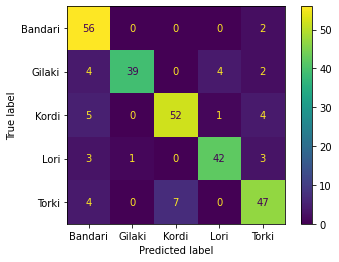

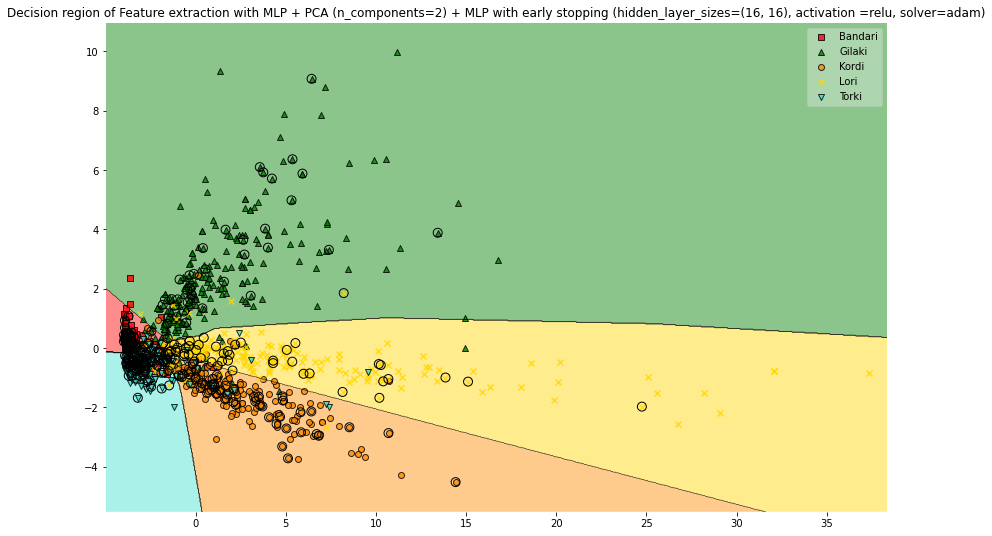

In [53]:
pca = PCA(n_components=2)
X_r_train = pca.fit(np.array(extractor(X_train.to_numpy())[4])).transform(np.array(extractor(X_train.to_numpy())[4]))
X_r_test = pca.transform(np.array(extractor(X_test.to_numpy())[4]))
X_r = pca.transform(np.array(extractor(X)[4]))

MLP = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=200, activation ='relu', solver='adam', early_stopping=True, n_iter_no_change=20, validation_fraction=0.2, random_state=1)
MLP.fit(X_r_train, y_train)
plt.figure(figsize=(6, 4))
plt.plot(MLP.loss_curve_)
plt.title("Model Loss Curve")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
y_pred = MLP.predict(X_r_test) 
print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)
plt.figure(figsize=(14, 9))
ax = plot_decision_regions(X_r, y, clf=MLP, X_highlight=X_r_test, legend=2, colors=','.join(colors))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, encoder.classes_, framealpha=0.3)
plt.title('Decision region of Feature extraction with MLP + PCA (n_components=2) + MLP with early stopping (hidden_layer_sizes=(16, 16), activation =relu, solver=adam)')
plt.show()

Feature extraction with MLP + LDA + MLP

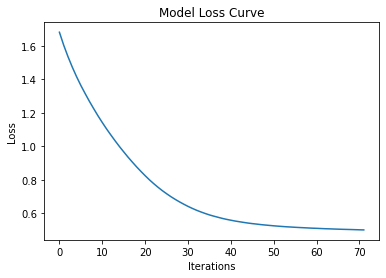

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        58
           1       0.85      0.80      0.82        49
           2       0.80      0.79      0.80        62
           3       0.83      0.78      0.80        49
           4       0.77      0.81      0.79        58

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



D:\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


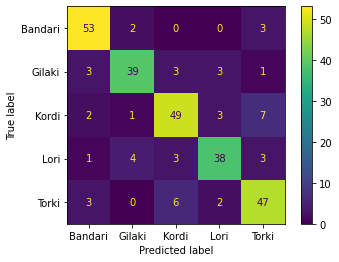

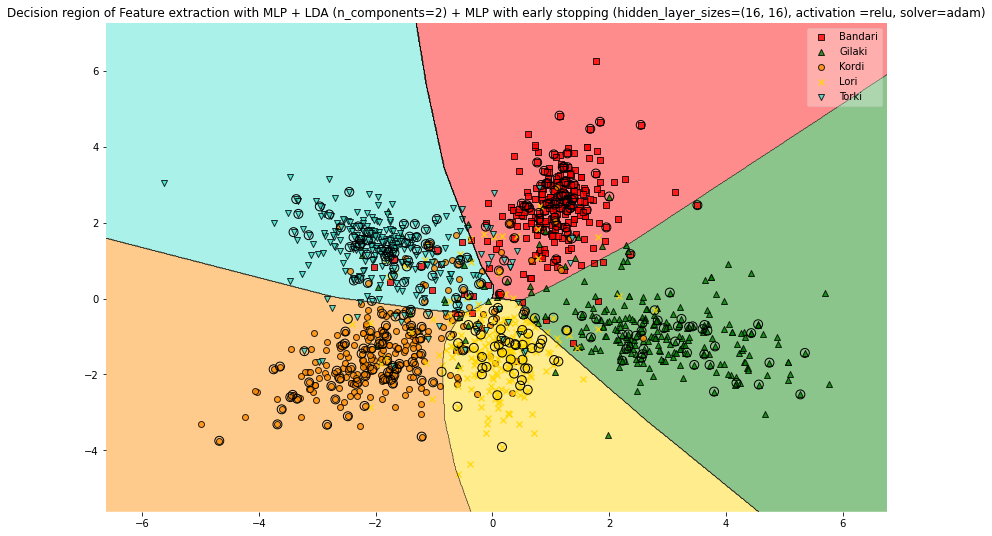

In [54]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r_train = lda.fit(np.array(extractor(X_train.to_numpy())[4]), y_train).transform(np.array(extractor(X_train.to_numpy())[4]))
X_r_test = lda.transform(np.array(extractor(X_test.to_numpy())[4]))
X_r = lda.transform(np.array(extractor(X)[4]))

MLP = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=200, activation ='relu', solver='adam', early_stopping=True, n_iter_no_change=20, validation_fraction=0.2, random_state=1)
MLP.fit(X_r_train, y_train)
plt.figure(figsize=(6, 4))
plt.plot(MLP.loss_curve_)
plt.title("Model Loss Curve")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
y_pred = MLP.predict(X_r_test) 
print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)
plt.figure(figsize=(14, 9))
ax = plot_decision_regions(X_r, y, clf=MLP, X_highlight=X_r_test, legend=2, colors=','.join(colors))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, encoder.classes_, framealpha=0.3)
plt.title('Decision region of Feature extraction with MLP + LDA (n_components=2) + MLP with early stopping (hidden_layer_sizes=(16, 16), activation =relu, solver=adam)')
plt.show()

Feature extraction with MLP + PCA + SVM

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        58
           1       0.96      0.55      0.70        49
           2       0.47      0.94      0.62        62
           3       1.00      0.33      0.49        49
           4       0.87      0.69      0.77        58

    accuracy                           0.70       276
   macro avg       0.83      0.68      0.69       276
weighted avg       0.82      0.70      0.70       276



D:\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


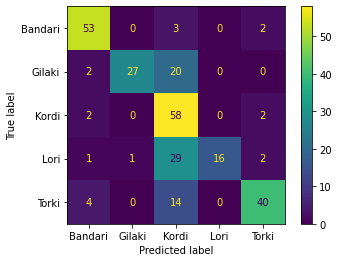

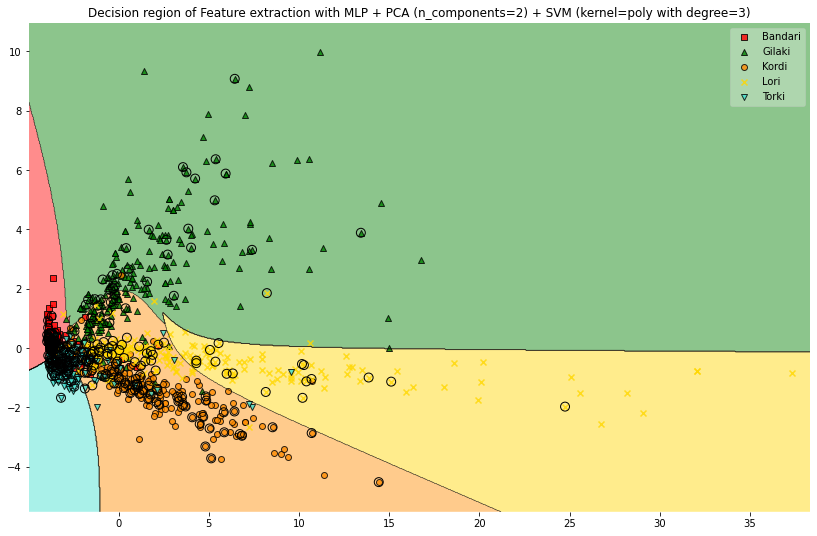

In [55]:
pca = PCA(n_components=2)
X_r_train = pca.fit(np.array(extractor(X_train.to_numpy())[4])).transform(np.array(extractor(X_train.to_numpy())[4]))
X_r_test = pca.transform(np.array(extractor(X_test.to_numpy())[4]))
X_r = pca.transform(np.array(extractor(X)[4]))

SVM = svm.SVC(kernel='poly', degree=3, C=1.5, random_state=1).fit(X_r_train, y_train)
y_pred = SVM.predict(X_r_test)
print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)
plt.figure(figsize=(14,9))
ax = plot_decision_regions(X_r, y, clf=SVM, X_highlight=X_r_test, legend=2, colors=','.join(colors))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, encoder.classes_, framealpha=0.3, scatterpoints=1)
plt.title('Decision region of Feature extraction with MLP + PCA (n_components=2) + SVM (kernel=poly with degree=3)')
plt.show()

Feature extraction with MLP + LDA + SVM

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        58
           1       0.95      0.78      0.85        49
           2       0.90      0.76      0.82        62
           3       0.56      0.88      0.68        49
           4       0.84      0.72      0.78        58

    accuracy                           0.80       276
   macro avg       0.83      0.81      0.81       276
weighted avg       0.84      0.80      0.81       276



D:\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


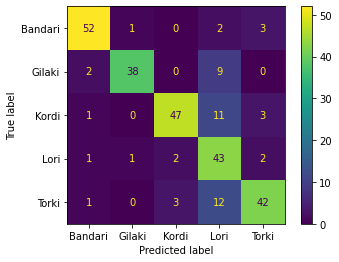

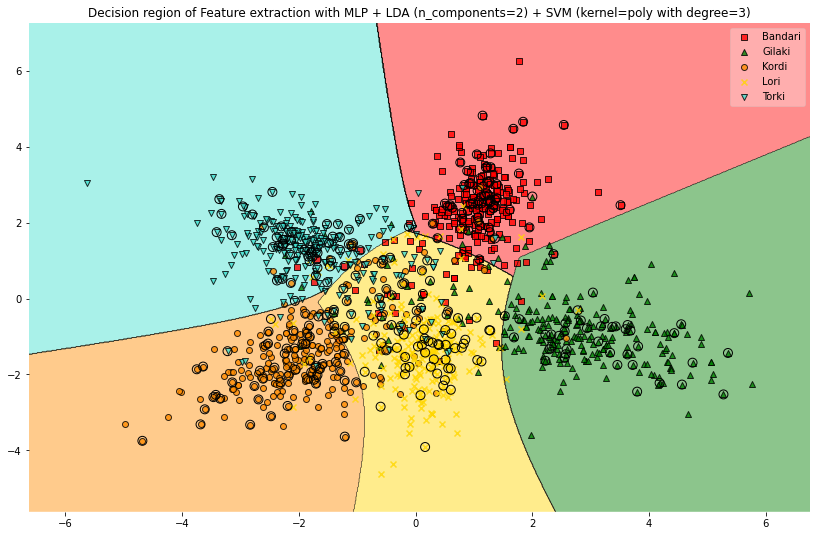

In [56]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r_train = lda.fit(np.array(extractor(X_train.to_numpy())[4]), y_train).transform(np.array(extractor(X_train.to_numpy())[4]))
X_r_test = lda.transform(np.array(extractor(X_test.to_numpy())[4]))
X_r = lda.transform(np.array(extractor(X)[4]))

SVM = svm.SVC(kernel='poly', degree=3, C=1.5, random_state=1).fit(X_r_train, y_train)
y_pred = SVM.predict(X_r_test)
print(classification_report(y_test, y_pred))    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)
plt.figure(figsize=(14,9))
ax = plot_decision_regions(X_r, y, clf=SVM, X_highlight=X_r_test, legend=2, colors=','.join(colors))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, encoder.classes_, framealpha=0.3, scatterpoints=1)
plt.title('Decision region of Feature extraction with MLP + LDA (n_components=2) + SVM (kernel=poly with degree=3)')
plt.show()

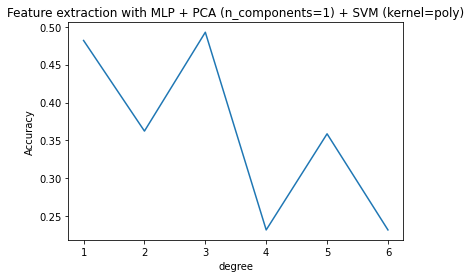

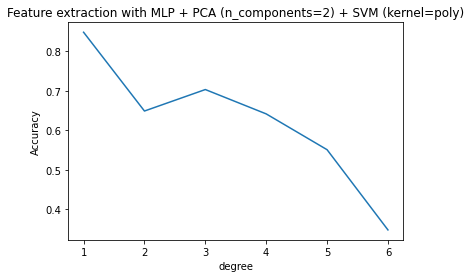

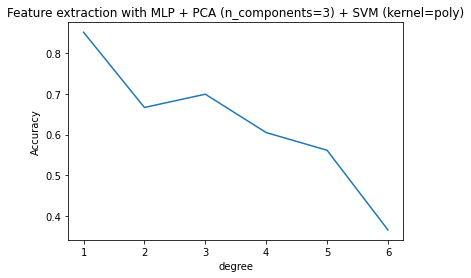

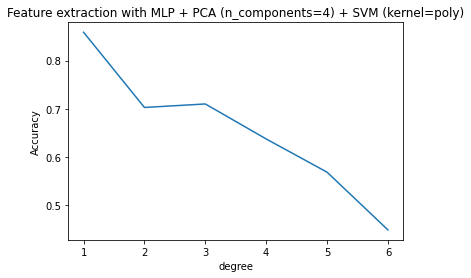

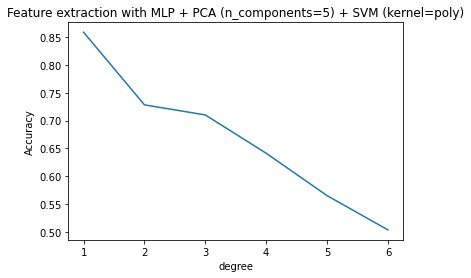

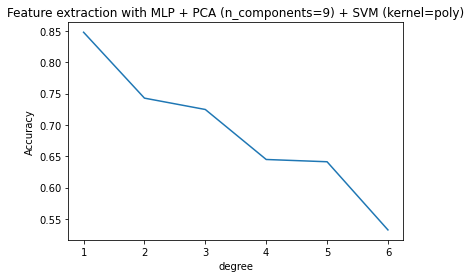

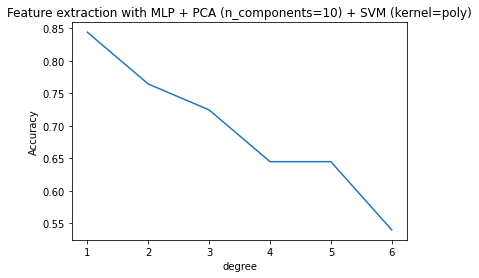

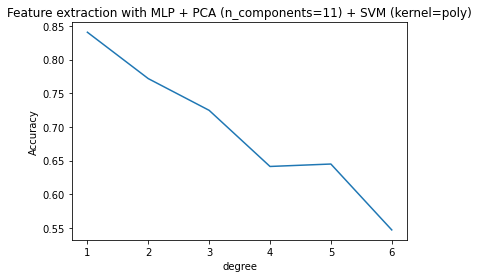

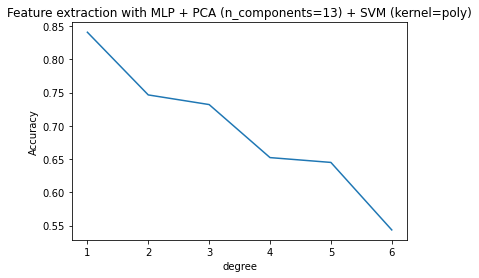

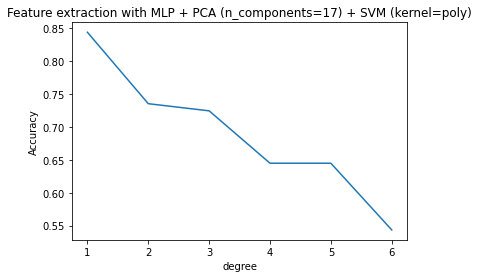

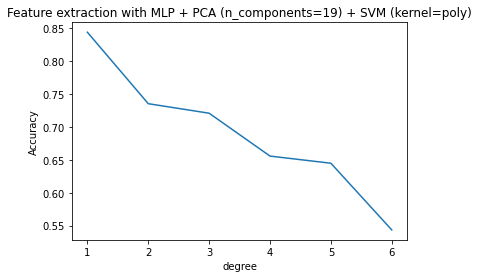

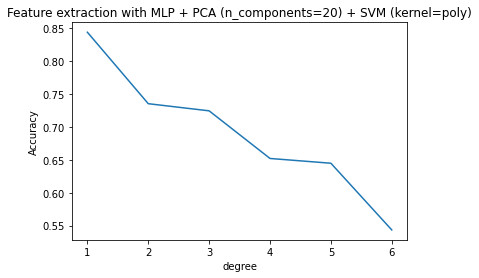

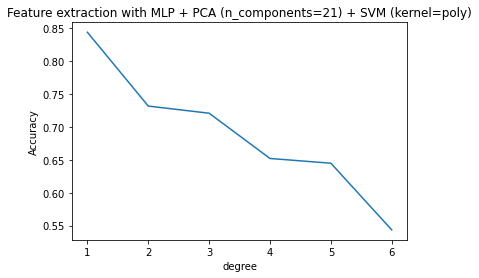

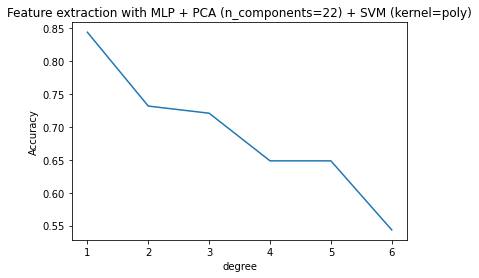

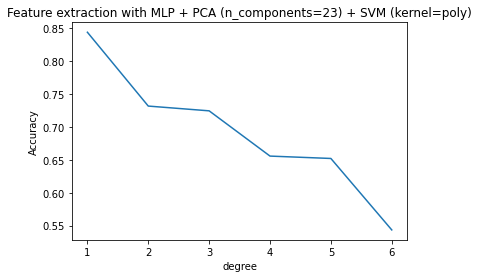

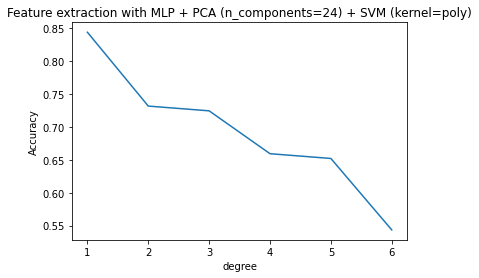

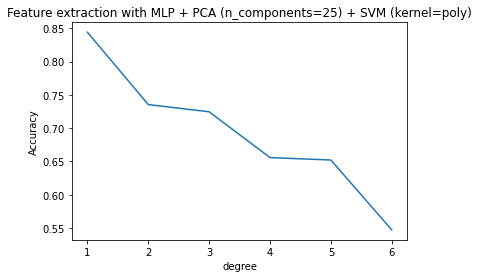

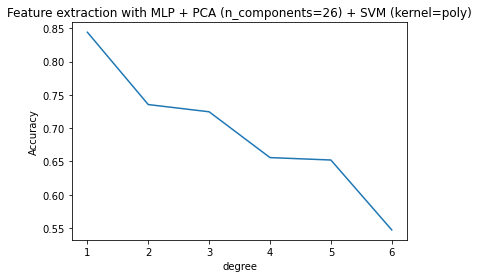

In [58]:
for n in range(1, 27):
    scores = list()
    pca = PCA(n_components=n)
    X_r_train = pca.fit(np.array(extractor(X_train.to_numpy())[4])).transform(np.array(extractor(X_train.to_numpy())[4]))
    X_r_test = pca.transform(np.array(extractor(X_test.to_numpy())[4]))
    for d in range(1, 7):
        SVM = svm.SVC(kernel='poly', degree=d, C=1.5, random_state=1).fit(X_r_train, y_train)
        y_pred = SVM.predict(X_r_test)
        scores.append(accuracy_score(y_test,  SVM.predict(X_r_test)))
        
    plt.figure(figsize=(6, 4))
    plt.plot([int(d) for d in range (1, 7)], scores)
    plt.xlabel('degree')
    plt.ylabel('Accuracy')
    plt.title('Feature extraction with MLP + PCA (n_components=%d) + SVM (kernel=poly)' %(n))
    plt.show()

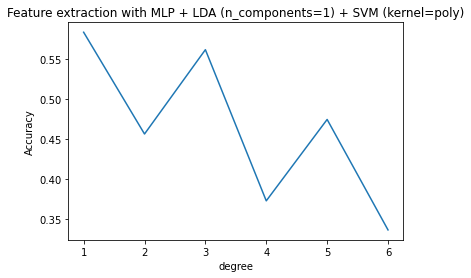

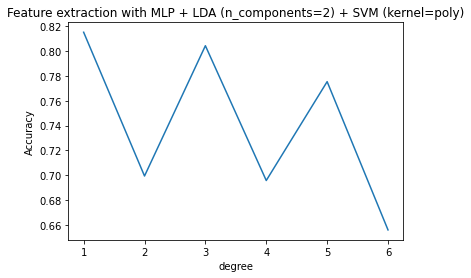

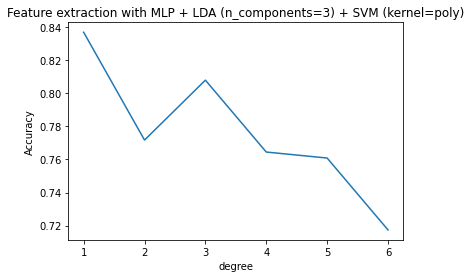

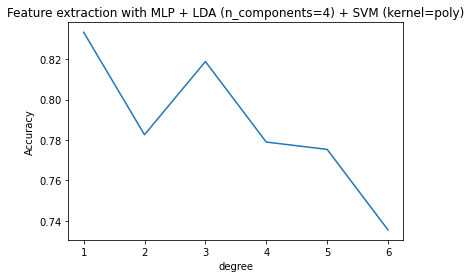

In [59]:
for n in range(1, 5):
    scores = list()
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_r_train = lda.fit(np.array(extractor(X_train.to_numpy())[4]), y_train).transform(np.array(extractor(X_train.to_numpy())[4]))
    X_r_test = lda.transform(np.array(extractor(X_test.to_numpy())[4]))
    for d in range(1, 7):
        SVM = svm.SVC(kernel='poly', degree=d, C=1.5, random_state=1).fit(X_r_train, y_train)
        y_pred = SVM.predict(X_r_test)
        scores.append(accuracy_score(y_test,  SVM.predict(X_r_test)))

    plt.figure(figsize=(6, 4))
    plt.plot([int(d) for d in range (1, 7)], scores)
    plt.xlabel('degree')
    plt.ylabel('Accuracy')
    plt.title('Feature extraction with MLP + LDA (n_components=%d) + SVM (kernel=poly)' %(n))
    plt.show()

**Clustering**

Clustering with Kmeans

In [13]:
n_clusters = 5
clusterer = KMeans(n_clusters=n_clusters, random_state=1)
cluster_labels = clusterer.fit_predict(X)

In [14]:
def make_cost_matrix(c1, c2):
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m
def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

              precision    recall  f1-score   support

           0       0.32      0.46      0.38       275
           1       0.42      0.24      0.31       267
           2       0.20      0.12      0.15       280
           3       0.37      0.34      0.35       269
           4       0.27      0.39      0.32       288

    accuracy                           0.31      1379
   macro avg       0.32      0.31      0.30      1379
weighted avg       0.32      0.31      0.30      1379



[Text(0, 0.5, 'Bandari'),
 Text(0, 1.5, 'Gilaki'),
 Text(0, 2.5, 'Kordi'),
 Text(0, 3.5, 'Lori'),
 Text(0, 4.5, 'Torki')]

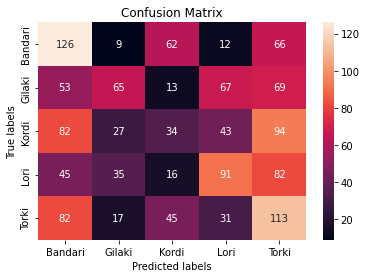

In [15]:
cost_matrix = make_cost_matrix(cluster_labels, y)
m = Munkres()
indexes = m.compute(cost_matrix)
mapper = { old: new for (old, new) in indexes }


new_labels = translate_clustering(cluster_labels, mapper)
print(classification_report(y, new_labels))  
new_cm = confusion_matrix(y, new_labels, labels=range(5))

ax= plt.subplot()
sns.heatmap(new_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(encoder.classes_)
ax.yaxis.set_ticklabels(encoder.classes_)

In [11]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

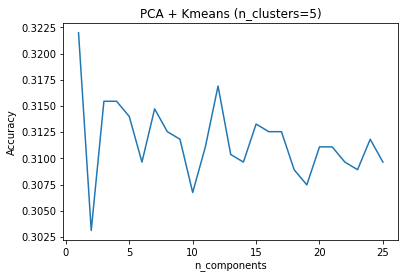

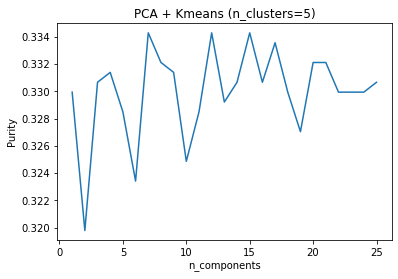

In [16]:
warnings.filterwarnings('ignore')
n_clusters = 5
acc_list = list()
purity_list = list()
for n_components in range(1, 26):
    reduced_data = PCA(n_components=n_components).fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = kmeans.fit_predict(reduced_data)
    cost_matrix = make_cost_matrix(cluster_labels, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }
    new_labels = translate_clustering(cluster_labels, mapper)
    acc_list.append(accuracy_score(y, new_labels))
    purity_list.append(purity_score(y, new_labels))

plt.figure(figsize=(6, 4))
plt.plot([int(d) for d in range (1, 26)], acc_list)
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.title('PCA + Kmeans (n_clusters=%d)' %(n_clusters))
plt.show()

plt.figure(figsize=(6, 4))
plt.plot([int(d) for d in range (1, 26)], purity_list)
plt.xlabel('n_components')
plt.ylabel('Purity')
plt.title('PCA + Kmeans (n_clusters=%d)' %(n_clusters))
plt.show()

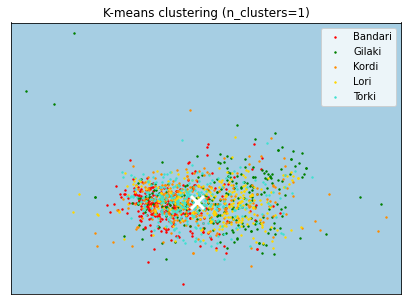

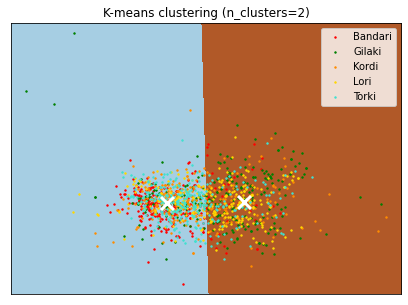

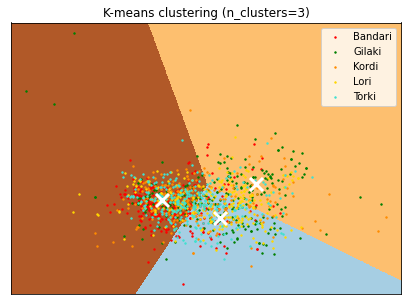

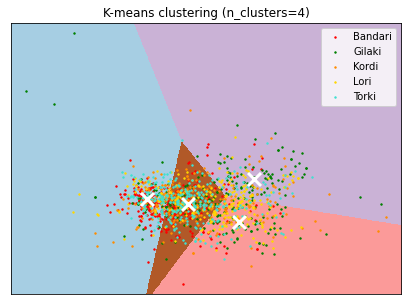

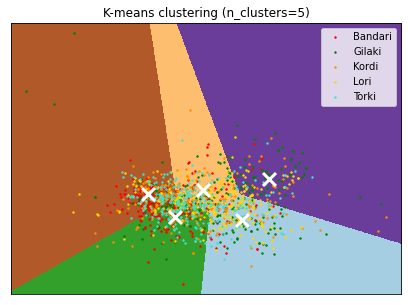

In [26]:
for n_clusters in range(1, 6):
    reduced_data = PCA(n_components=2).fit_transform(X)
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, random_state=1)
    kmeans.fit(reduced_data)

    # Step size of the mesh
    h = 0.02

    # Plot the decision boundary
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # labels for each point in mesh
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plotting result
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7, 5))
    plt.clf()
    plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
               cmap=plt.cm.Paired, aspect="auto", origin="lower")
    
    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], encoder.classes_):
        plt.scatter(reduced_data[y == i, 0], reduced_data[y == i, 1], color=color, label=target_name, s=2)
    plt.legend()
    
    # Plotting the centroids
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10)
    plt.title("K-means clustering (n_clusters=%d)" %(n_clusters))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

Clustering with AgglomerativeClustering

              precision    recall  f1-score   support

           0       0.39      0.52      0.44       275
           1       0.47      0.29      0.36       267
           2       0.24      0.37      0.29       280
           3       0.40      0.38      0.39       269
           4       0.29      0.17      0.21       288

    accuracy                           0.34      1379
   macro avg       0.36      0.34      0.34      1379
weighted avg       0.36      0.34      0.34      1379



[Text(0, 0.5, 'Bandari'),
 Text(0, 1.5, 'Gilaki'),
 Text(0, 2.5, 'Kordi'),
 Text(0, 3.5, 'Lori'),
 Text(0, 4.5, 'Torki')]

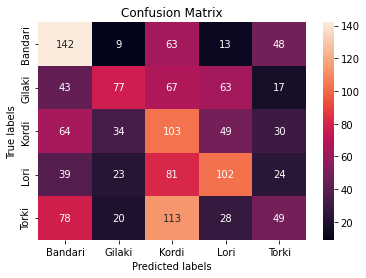

In [13]:
n_clusters = 5
clusterer = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clusterer.fit_predict(X)

cost_matrix = make_cost_matrix(cluster_labels, y)
m = Munkres()
indexes = m.compute(cost_matrix)
mapper = { old: new for (old, new) in indexes }


new_labels = translate_clustering(cluster_labels, mapper)
print(classification_report(y, new_labels))  
new_cm = confusion_matrix(y, new_labels, labels=range(5))

ax= plt.subplot()
sns.heatmap(new_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(encoder.classes_)
ax.yaxis.set_ticklabels(encoder.classes_)

In [18]:
def plot_clustering(X_red, labels,y ,title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    for digit in y:
        plt.scatter(X_red[labels == digit, 0], X_red[labels == digit, 1], s=2, color = colors[digit])

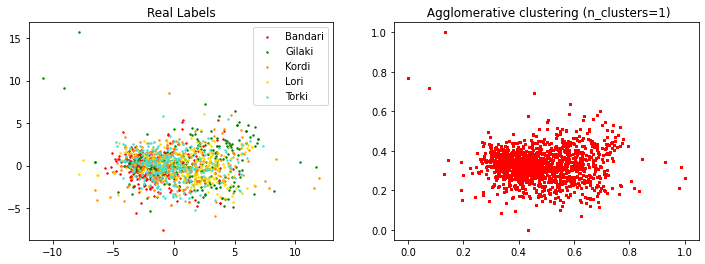

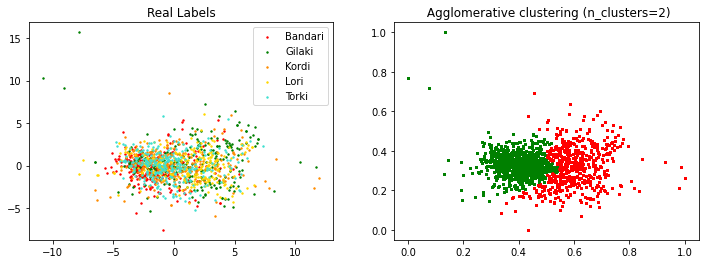

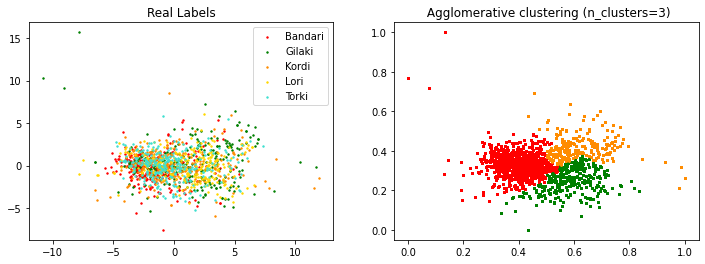

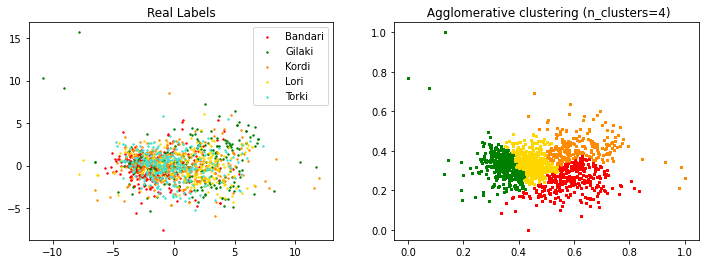

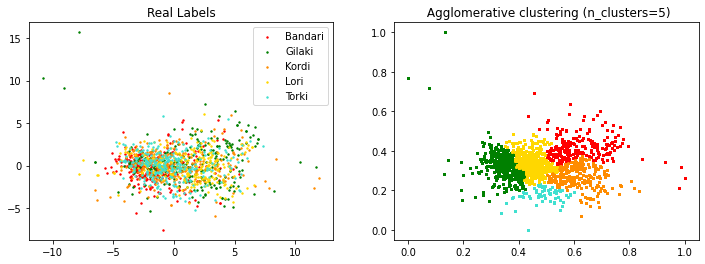

In [21]:
for n_clusters in range(1, 6):
    reduced_data = PCA(n_components=2).fit_transform(X)
    Agglo = AgglomerativeClustering(n_clusters=n_clusters)
    Agglo.fit(reduced_data)
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], encoder.classes_):
        plt.scatter(reduced_data[y == i, 0], reduced_data[y == i, 1], color=color, label=target_name, s=2)
        plt.title("Real Labels")
    plt.legend()
    plt.subplot(1,2,2)
    plot_clustering(reduced_data, Agglo.labels_,y)


    plt.title(" Agglomerative clustering (n_clusters=%d)" %(n_clusters))
    plt.show()

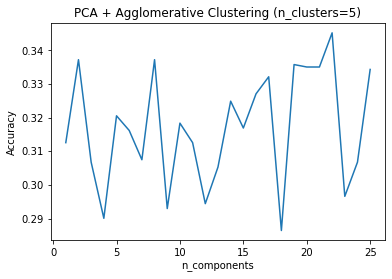

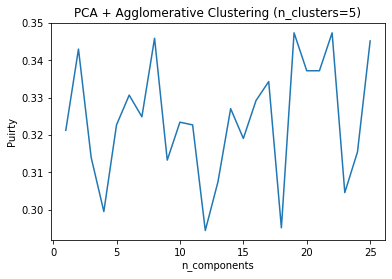

In [17]:
n_clusters = 5
acc_list = list()
purity_list = list()
for n_components in range(1, 26):
    reduced_data = PCA(n_components=n_components).fit_transform(X)
    kmeans = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(reduced_data)
    cost_matrix = make_cost_matrix(cluster_labels, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }
    new_labels = translate_clustering(cluster_labels, mapper)
    acc_list.append(accuracy_score(y, new_labels))
    purity_list.append(purity_score(y, new_labels))

plt.figure(figsize=(6, 4))
plt.plot([int(d) for d in range (1, 26)], acc_list)
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.title('PCA + Agglomerative Clustering (n_clusters=%d)' %(n_clusters))
plt.show()

plt.figure(figsize=(6, 4))
plt.plot([int(d) for d in range (1, 26)], purity_list)
plt.xlabel('n_components')
plt.ylabel('Puirty')
plt.title('PCA + Agglomerative Clustering (n_clusters=%d)' %(n_clusters))
plt.show()